In [1]:
import pandas as pd
import numpy as np
import os,glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import holidays
from holidays import country_holidays
import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [2]:
# File location
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Loading and cleaning Chicago Crime Data

In [3]:
# Full file

# Get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
chicago = pd.concat([pd.read_csv(f) for f in crime_files])
chicago

ID                    Date                Primary Type  \
0        1315987  01/01/2001 01:00:00 AM             CRIMINAL DAMAGE   
1        3212105  01/01/2001 01:00:00 AM  OFFENSE INVOLVING CHILDREN   
2        1315458  01/01/2001 01:00:00 AM                       THEFT   
3        1319931  01/01/2001 01:00:00 PM                     BATTERY   
4        1317937  01/01/2001 01:00:00 AM                     BATTERY   
...          ...                     ...                         ...   
101839  13093875  06/01/2023 12:51:00 AM                       THEFT   
101840  13092604  06/01/2023 12:52:00 PM                   NARCOTICS   
101841  13092639  06/01/2023 12:52:00 PM           WEAPONS VIOLATION   
101842  13092053  06/01/2023 12:53:00 AM                     BATTERY   
101843  13092118  06/01/2023 12:55:00 AM                       THEFT   

                           Description     Location Description  Arrest  \
0                          TO PROPERTY            CHA APARTMENT   False   
1       AGG SEX ASSLT OF CHILD FAM MBR                RESIDENCE    True   
2                       $500 AND UNDER                   STREET   False   
3                               SIMPLE                RESIDENCE   False   
4                               SIMPLE  RESIDENCE PORCH/HALLWAY   False   
...                                ...                      ...     ...   
101839                  $500 AND UNDER                   STREET   False   
101840        POSSESS - HEROIN (WHITE)                    ALLEY    True   
101841          UNLAWFUL USE - HANDGUN                    ALLEY    True   
101842         DOMESTIC BATTERY SIMPLE                APARTMENT   False   
101843                       OVER $500                   STREET   False   

        Domestic  Beat  District  Ward   Latitude  Longitude  
0          False  1823      18.0   NaN  41.899860 -87.639877  
1          False   913       9.0  14.0  41.823730 -87.698440  
2          False  1421      14.0   NaN  41.910320 -87.702020  
3          False   825       8.0   NaN  41.783892 -87.684841  
4          False   334       3.0   NaN  41.762514 -87.565877  
...          ...   ...       ...   ...        ...        ...  
101839     False  1931      19.0  32.0  41.932304 -87.676607  
101840     False   122       1.0  34.0  41.878114 -87.634277  
101841     False   331       3.0   5.0  41.767252 -87.572664  
101842      True   725       7.0  16.0  41.772218 -87.662366  
101843     False  2233      22.0  21.0  41.697242 -87.634090  

[7813921 rows x 12 columns]

In [4]:
# setting the format for datetime
date_format = "%m/%d/%Y %H:%M:%S %p"

# Converting to Datetime

chicago['Datetime'] = pd.to_datetime(chicago['Date'], format=date_format)
chicago = chicago.sort_values('Datetime')
# Set datetime as index
chicago = chicago.set_index('Datetime')
chicago

ID                    Date         Primary Type  \
Datetime                                                                     
2001-01-01 01:00:00   1315987  01/01/2001 01:00:00 AM      CRIMINAL DAMAGE   
2001-01-01 01:00:00   6154338  01/01/2001 01:00:00 PM                THEFT   
2001-01-01 01:00:00   1311503  01/01/2001 01:00:00 AM  CRIM SEXUAL ASSAULT   
2001-01-01 01:00:00   1325760  01/01/2001 01:00:00 PM            NARCOTICS   
2001-01-01 01:00:00   1315701  01/01/2001 01:00:00 PM              BATTERY   
...                       ...                     ...                  ...   
2023-06-01 12:51:00  13093875  06/01/2023 12:51:00 AM                THEFT   
2023-06-01 12:52:00  13092604  06/01/2023 12:52:00 PM            NARCOTICS   
2023-06-01 12:52:00  13092639  06/01/2023 12:52:00 PM    WEAPONS VIOLATION   
2023-06-01 12:53:00  13092053  06/01/2023 12:53:00 AM              BATTERY   
2023-06-01 12:55:00  13092118  06/01/2023 12:55:00 AM                THEFT   

                                       Description  \
Datetime                                             
2001-01-01 01:00:00                    TO PROPERTY   
2001-01-01 01:00:00  FINANCIAL ID THEFT: OVER $300   
2001-01-01 01:00:00  AGGRAVATED: OTHER DANG WEAPON   
2001-01-01 01:00:00   POSS: CANNABIS 30GMS OR LESS   
2001-01-01 01:00:00            AGGRAVATED: HANDGUN   
...                                            ...   
2023-06-01 12:51:00                 $500 AND UNDER   
2023-06-01 12:52:00       POSSESS - HEROIN (WHITE)   
2023-06-01 12:52:00         UNLAWFUL USE - HANDGUN   
2023-06-01 12:53:00        DOMESTIC BATTERY SIMPLE   
2023-06-01 12:55:00                      OVER $500   

                             Location Description  Arrest  Domestic  Beat  \
Datetime                                                                    
2001-01-01 01:00:00                 CHA APARTMENT   False     False  1823   
2001-01-01 01:00:00                     RESIDENCE   False     False   831   
2001-01-01 01:00:00                 BAR OR TAVERN   False     False  1933   
2001-01-01 01:00:00  GOVERNMENT BUILDING/PROPERTY    True     False  1033   
2001-01-01 01:00:00                     RESIDENCE   False     False  1132   
...                                           ...     ...       ...   ...   
2023-06-01 12:51:00                        STREET   False     False  1931   
2023-06-01 12:52:00                         ALLEY    True     False   122   
2023-06-01 12:52:00                         ALLEY    True     False   331   
2023-06-01 12:53:00                     APARTMENT   False      True   725   
2023-06-01 12:55:00                        STREET   False     False  2233   

                     District  Ward   Latitude  Longitude  
Datetime                                                   
2001-01-01 01:00:00      18.0   NaN  41.899860 -87.639877  
2001-01-01 01:00:00       8.0  15.0  41.774819 -87.702896  
2001-01-01 01:00:00      19.0   NaN  41.931374 -87.648819  
2001-01-01 01:00:00      10.0   NaN        NaN        NaN  
2001-01-01 01:00:00      11.0   NaN  41.866421 -87.725046  
...                       ...   ...        ...        ...  
2023-06-01 12:51:00      19.0  32.0  41.932304 -87.676607  
2023-06-01 12:52:00       1.0  34.0  41.878114 -87.634277  
2023-06-01 12:52:00       3.0   5.0  41.767252 -87.572664  
2023-06-01 12:53:00       7.0  16.0  41.772218 -87.662366  
2023-06-01 12:55:00      22.0  21.0  41.697242 -87.634090  

[7813921 rows x 12 columns]

In [5]:
# Dropping columns
chicago.drop(columns = ['ID', 'Latitude', 'Longitude', 'Arrest',
                        'Domestic', 'Location Description', 'Description',
                        'Date'], inplace = True)
chicago

Primary Type  Beat  District  Ward
Datetime                                                      
2001-01-01 01:00:00      CRIMINAL DAMAGE  1823      18.0   NaN
2001-01-01 01:00:00                THEFT   831       8.0  15.0
2001-01-01 01:00:00  CRIM SEXUAL ASSAULT  1933      19.0   NaN
2001-01-01 01:00:00            NARCOTICS  1033      10.0   NaN
2001-01-01 01:00:00              BATTERY  1132      11.0   NaN
...                                  ...   ...       ...   ...
2023-06-01 12:51:00                THEFT  1931      19.0  32.0
2023-06-01 12:52:00            NARCOTICS   122       1.0  34.0
2023-06-01 12:52:00    WEAPONS VIOLATION   331       3.0   5.0
2023-06-01 12:53:00              BATTERY   725       7.0  16.0
2023-06-01 12:55:00                THEFT  2233      22.0  21.0

[7813921 rows x 4 columns]

In [6]:
chicago['Total_Incidents'] = 1
chicago['Year'] = chicago.index.year
chicago['Month'] = chicago.index.month
chicago['MonthName'] = chicago.index.month_name()
chicago['HourofDay']  = chicago.index.hour
chicago

Primary Type  Beat  District  Ward  \
Datetime                                                         
2001-01-01 01:00:00      CRIMINAL DAMAGE  1823      18.0   NaN   
2001-01-01 01:00:00                THEFT   831       8.0  15.0   
2001-01-01 01:00:00  CRIM SEXUAL ASSAULT  1933      19.0   NaN   
2001-01-01 01:00:00            NARCOTICS  1033      10.0   NaN   
2001-01-01 01:00:00              BATTERY  1132      11.0   NaN   
...                                  ...   ...       ...   ...   
2023-06-01 12:51:00                THEFT  1931      19.0  32.0   
2023-06-01 12:52:00            NARCOTICS   122       1.0  34.0   
2023-06-01 12:52:00    WEAPONS VIOLATION   331       3.0   5.0   
2023-06-01 12:53:00              BATTERY   725       7.0  16.0   
2023-06-01 12:55:00                THEFT  2233      22.0  21.0   

                     Total_Incidents  Year  Month MonthName  HourofDay  
Datetime                                                                
2001-01-01 01:00:00                1  2001      1   January          1  
2001-01-01 01:00:00                1  2001      1   January          1  
2001-01-01 01:00:00                1  2001      1   January          1  
2001-01-01 01:00:00                1  2001      1   January          1  
2001-01-01 01:00:00                1  2001      1   January          1  
...                              ...   ...    ...       ...        ...  
2023-06-01 12:51:00                1  2023      6      June         12  
2023-06-01 12:52:00                1  2023      6      June         12  
2023-06-01 12:52:00                1  2023      6      June         12  
2023-06-01 12:53:00                1  2023      6      June         12  
2023-06-01 12:55:00                1  2023      6      June         12  

[7813921 rows x 9 columns]

## 1) Comparing Police Districts:

- Which district has the most crimes? 
- Which has the least?

In [7]:
district_crime_counts = chicago['District'].value_counts()

# Find the district with the most crimes
district_most_crimes = district_crime_counts.idxmax()

# Find the district with the least crimes
district_least_crimes = district_crime_counts.idxmin()

# Print the results
print(f"District with the most crimes:", district_most_crimes)
print("District with the least crimes:", district_least_crimes)


District with the most crimes: 8.0
District with the least crimes: 21.0


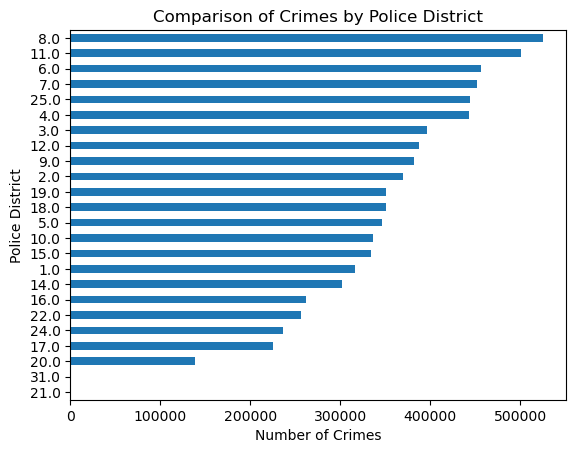

In [8]:
district_crime_counts.sort_values().plot(kind='barh')
plt.xlabel('Number of Crimes')
plt.ylabel('Police District')
plt.title('Comparison of Crimes by Police District')
plt.show()

## 2) Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

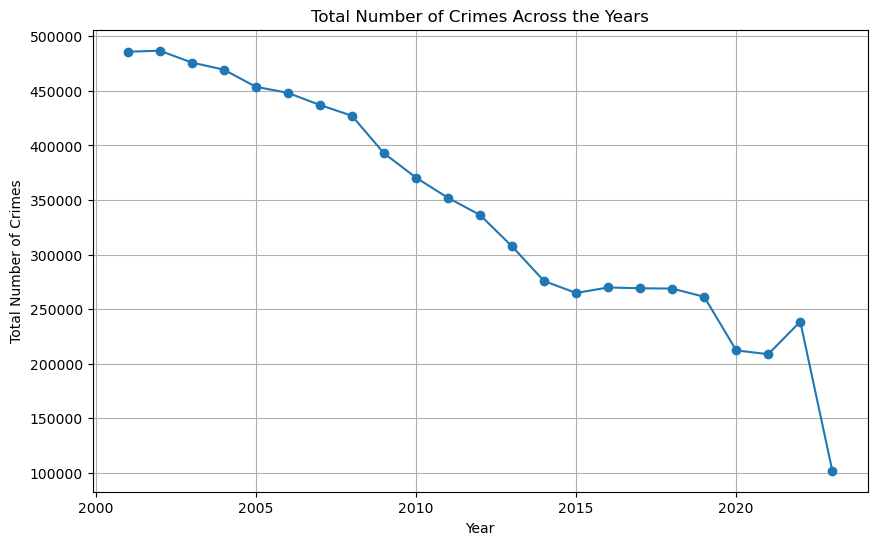

In [9]:
# Grouping data by year and counting total incidents
total_crimes_by_year = chicago.groupby('Year')['Total_Incidents'].sum()

# Plotting the total number of crimes across the years
plt.figure(figsize=(10, 6))
total_crimes_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.title('Total Number of Crimes Across the Years')
plt.grid(True)
plt.show()


### The total number of crimes is decreasing across the years

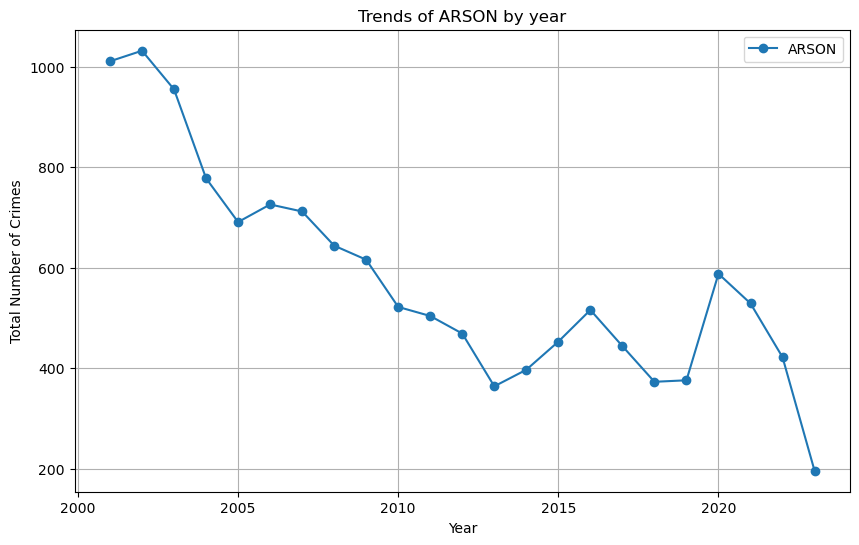

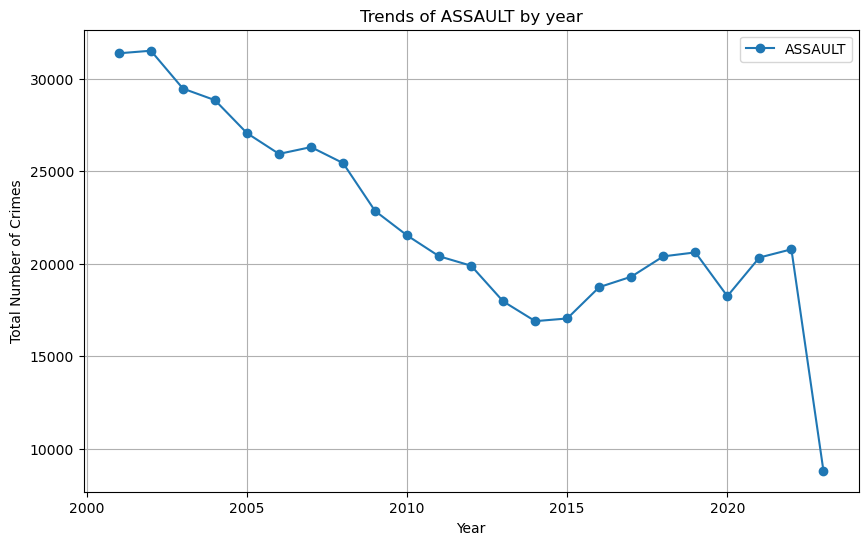

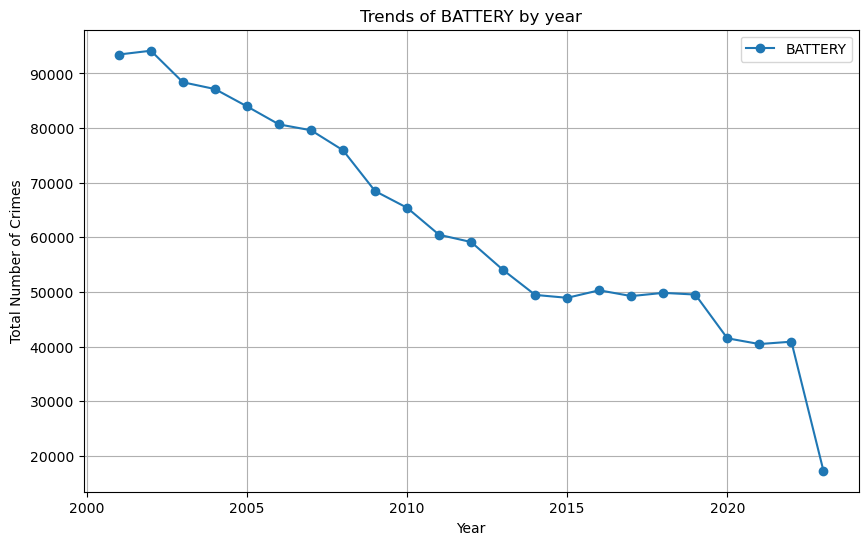

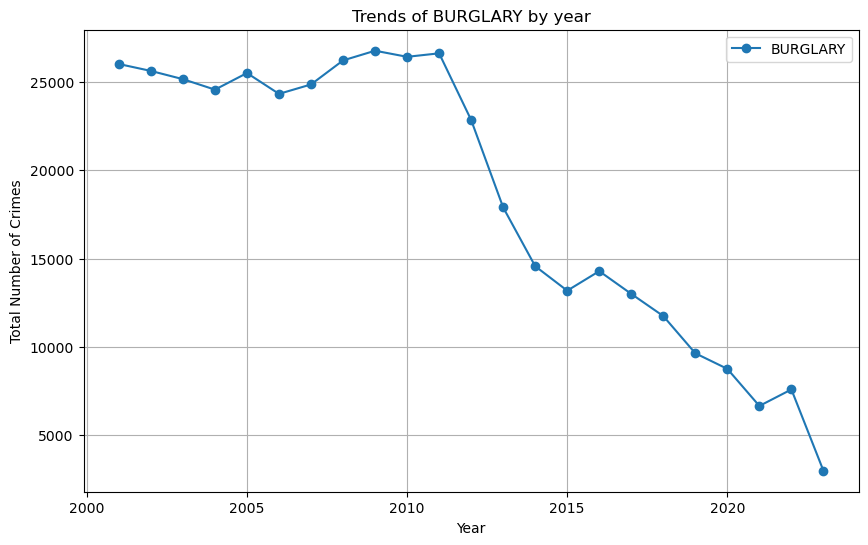

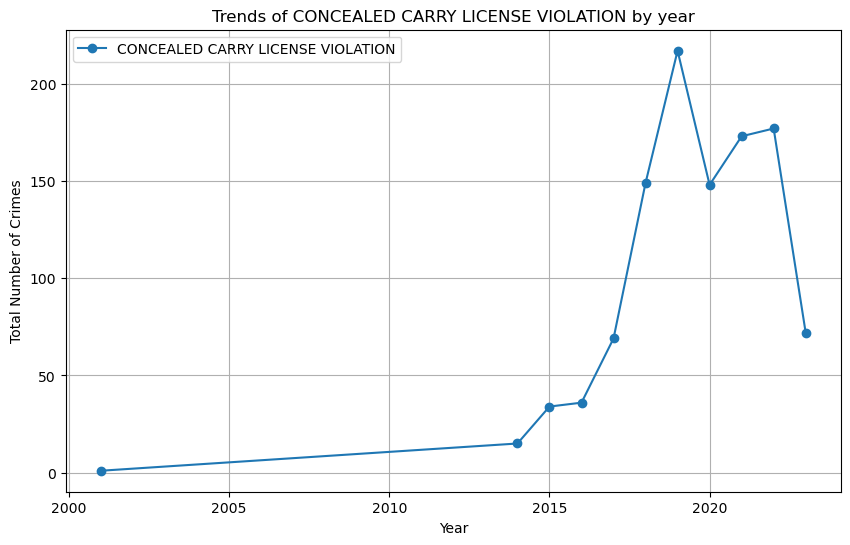

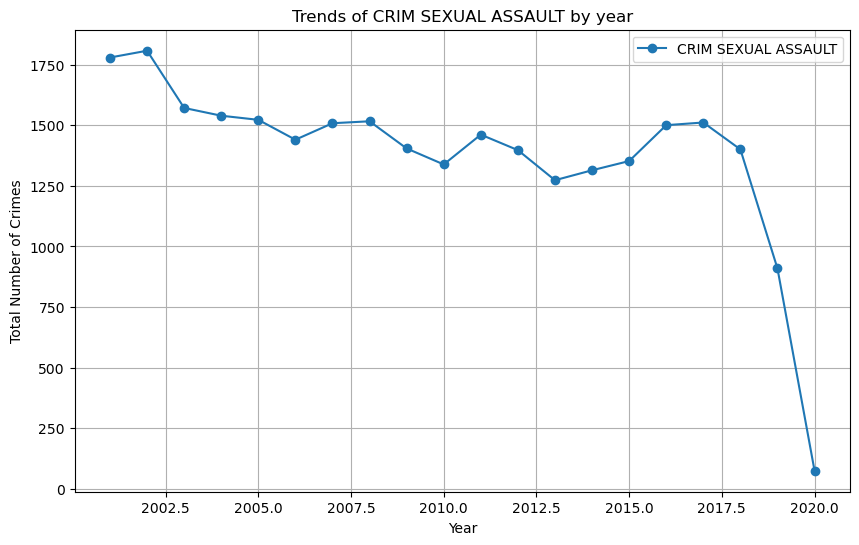

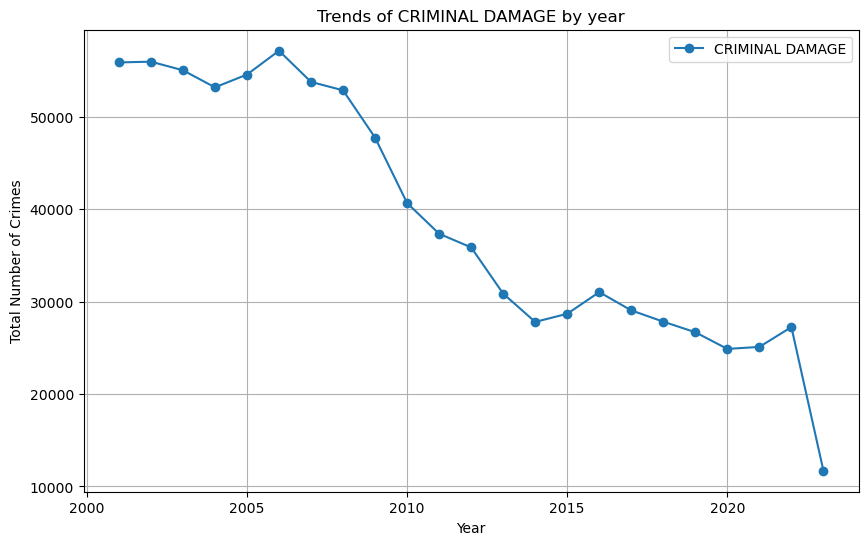

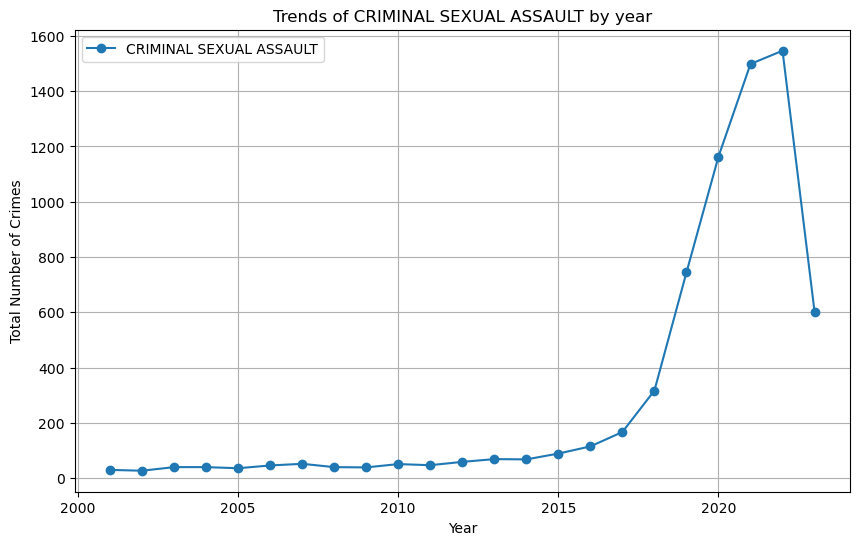

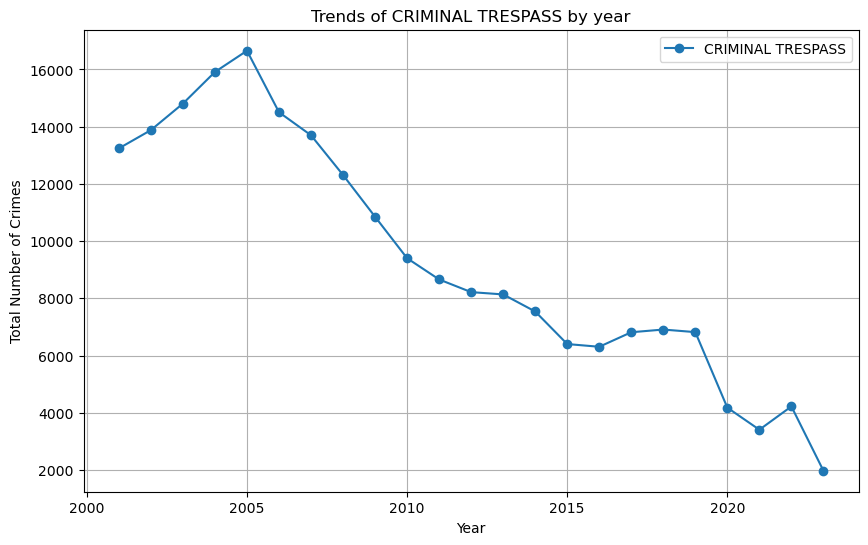

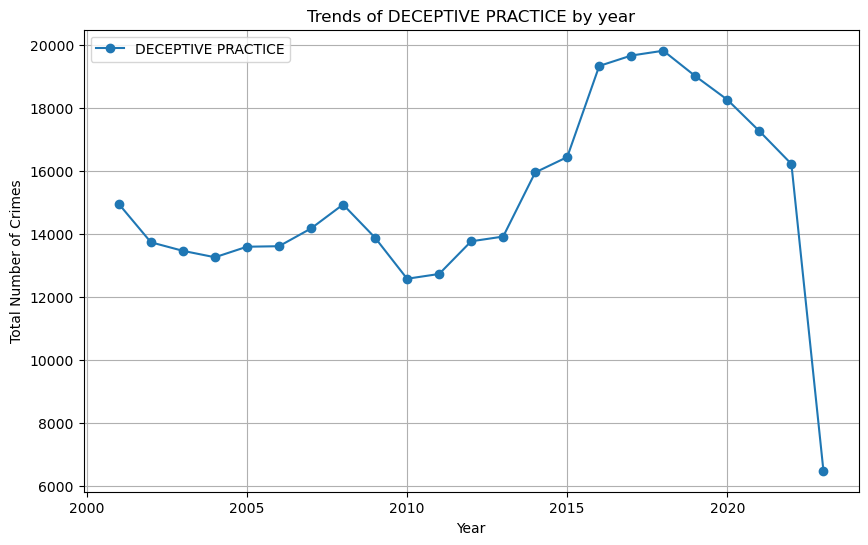

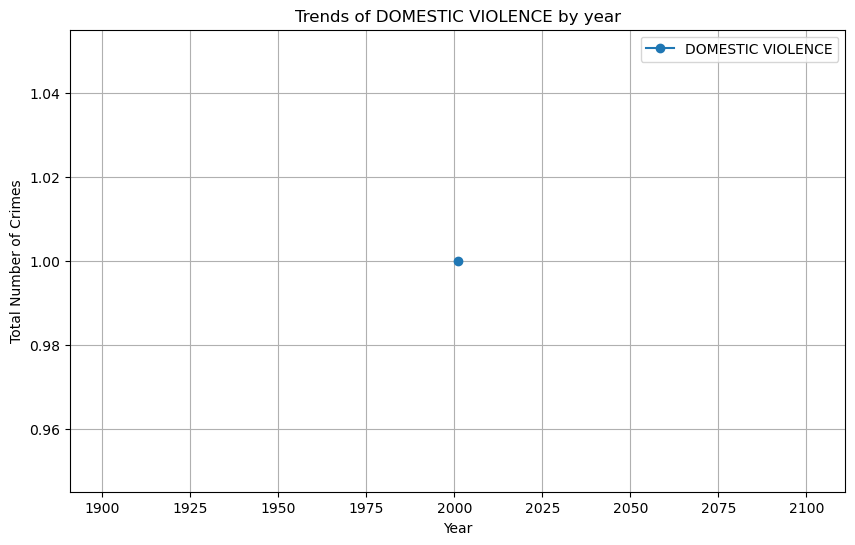

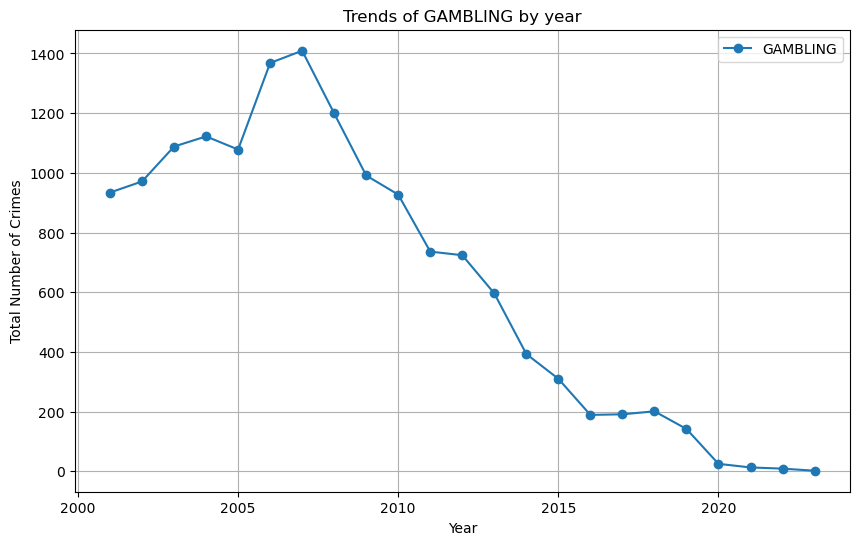

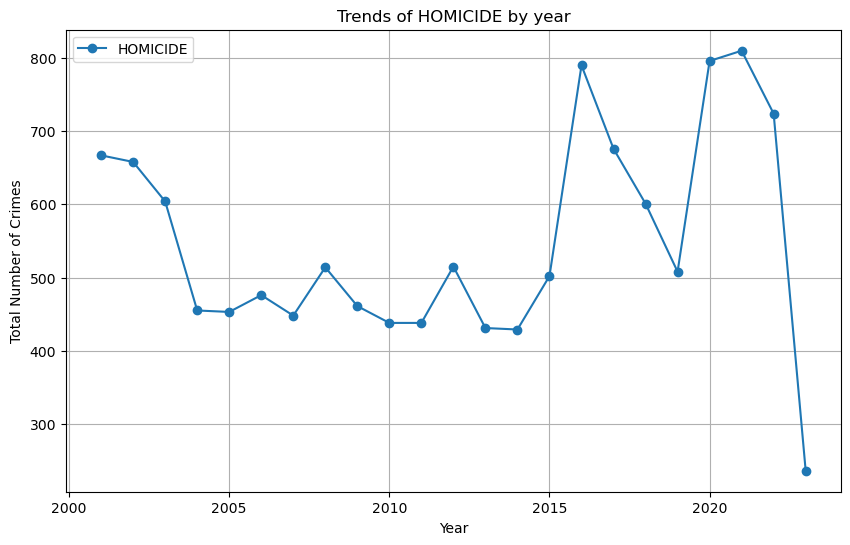

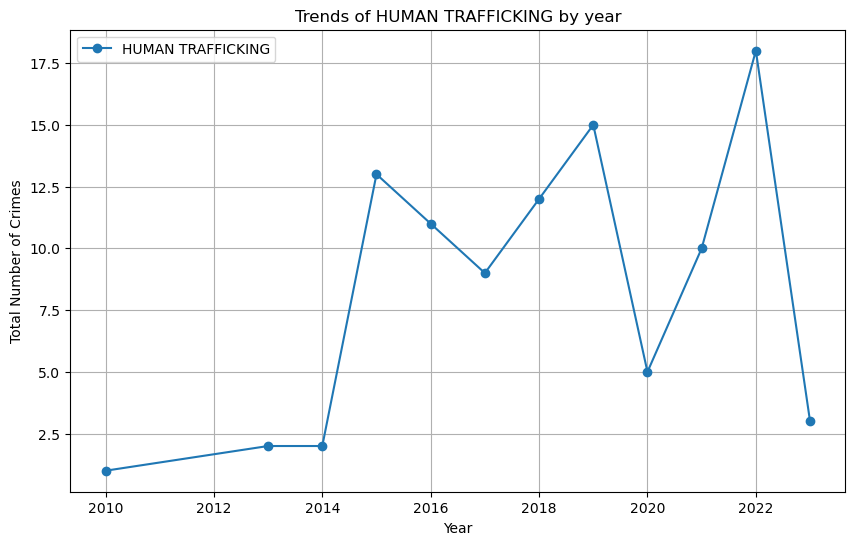

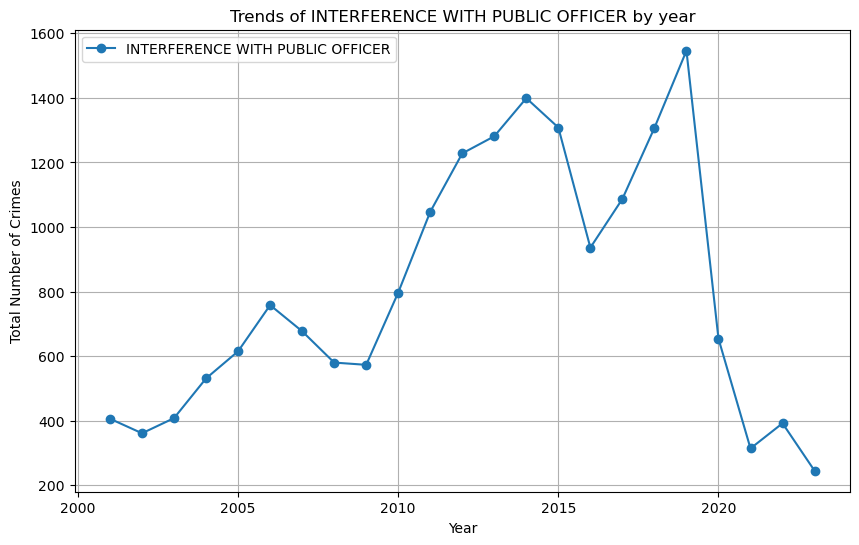

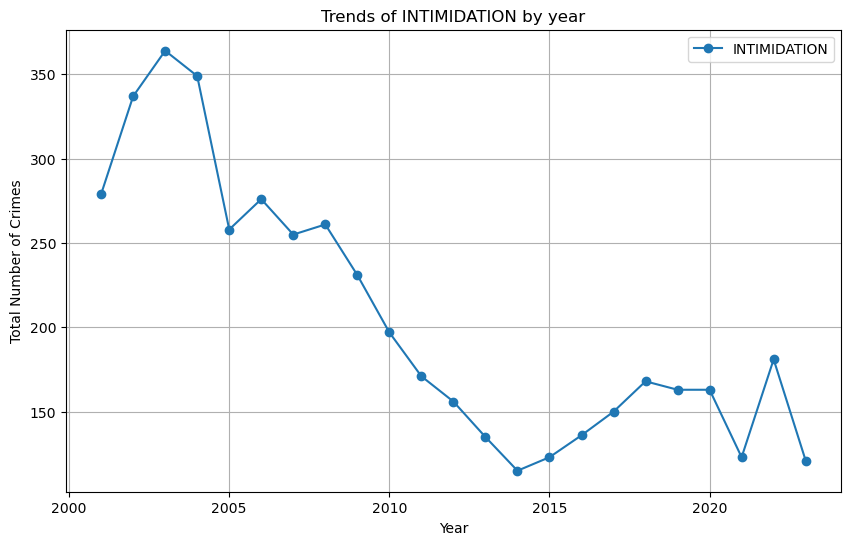

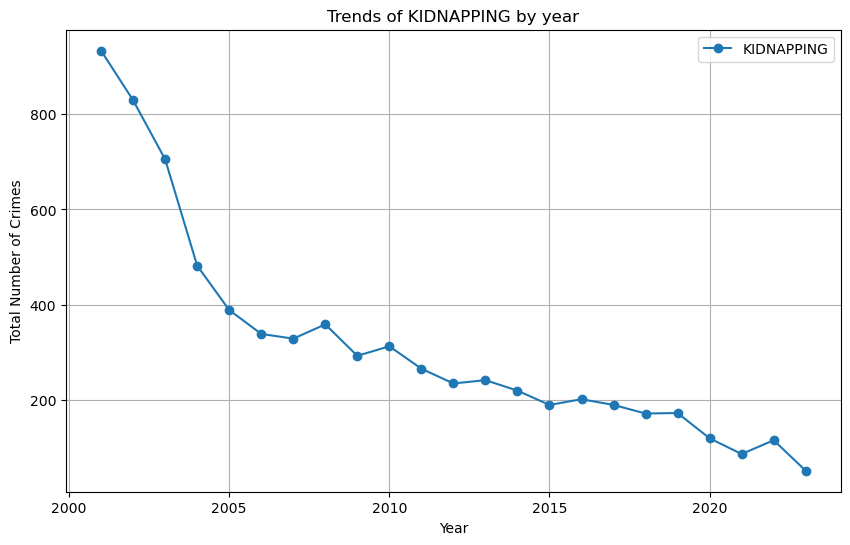

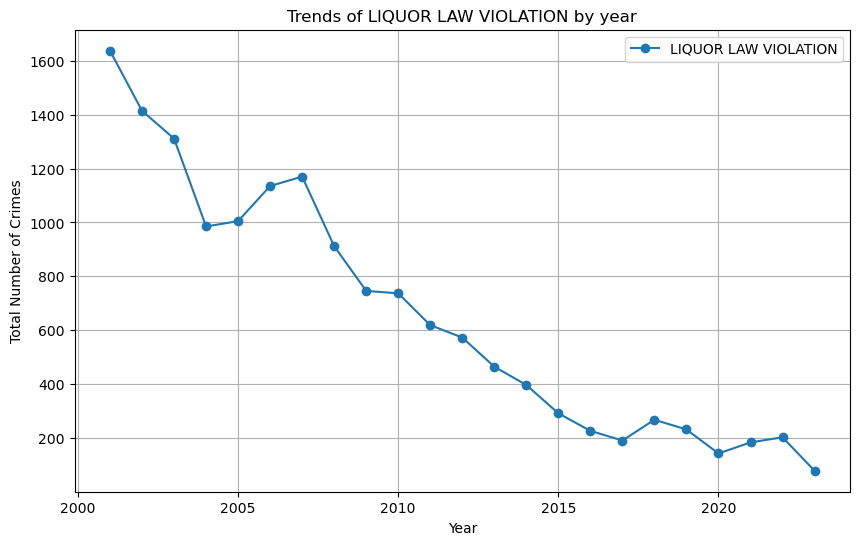

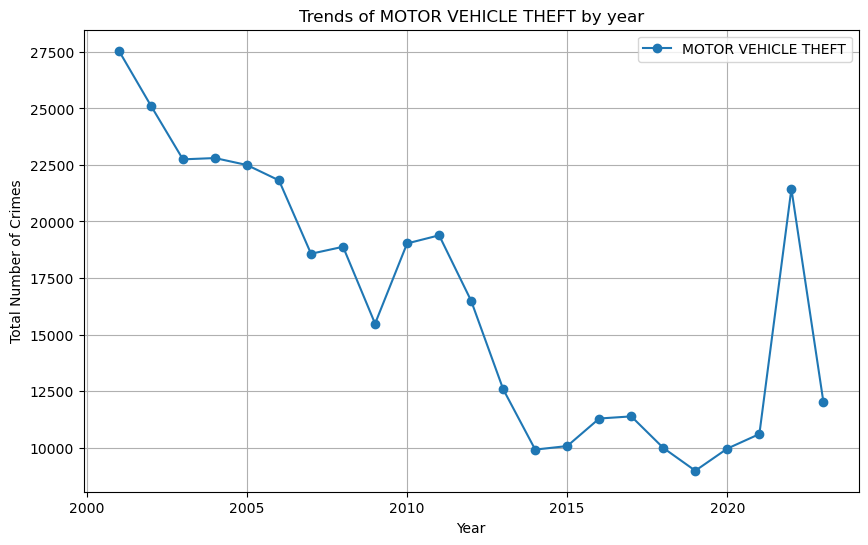

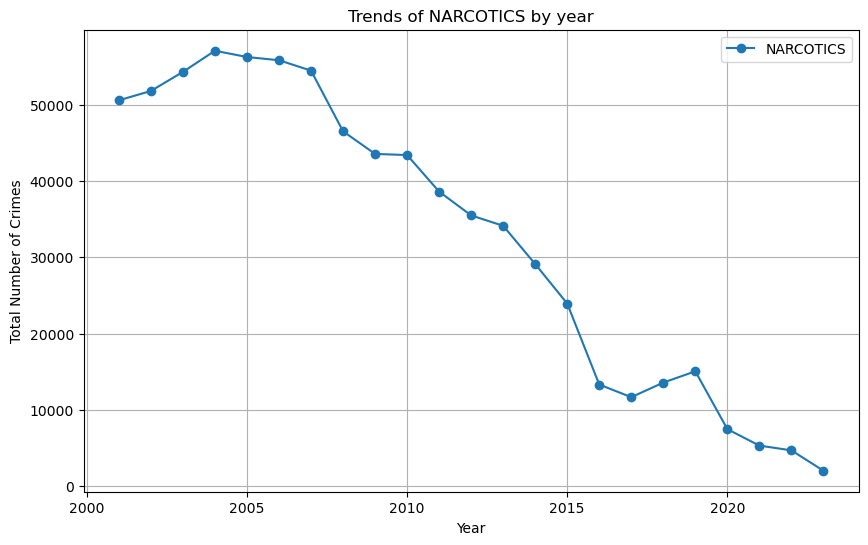

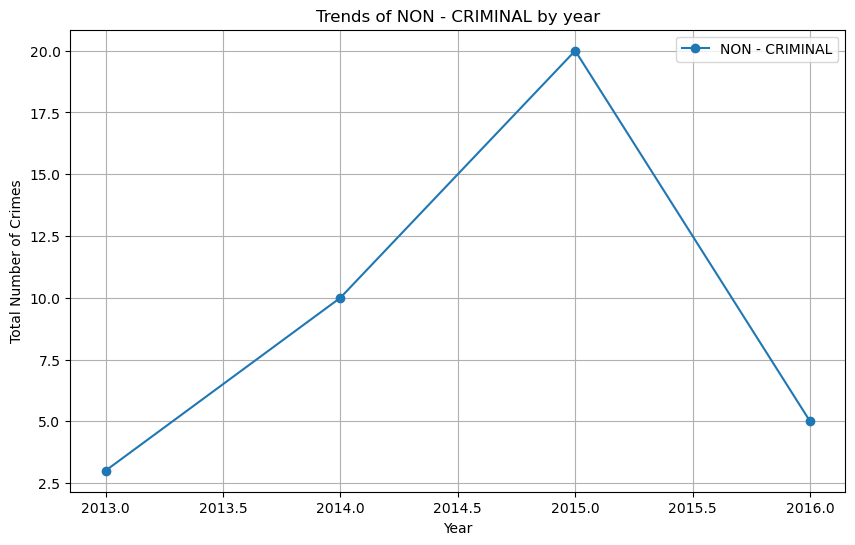

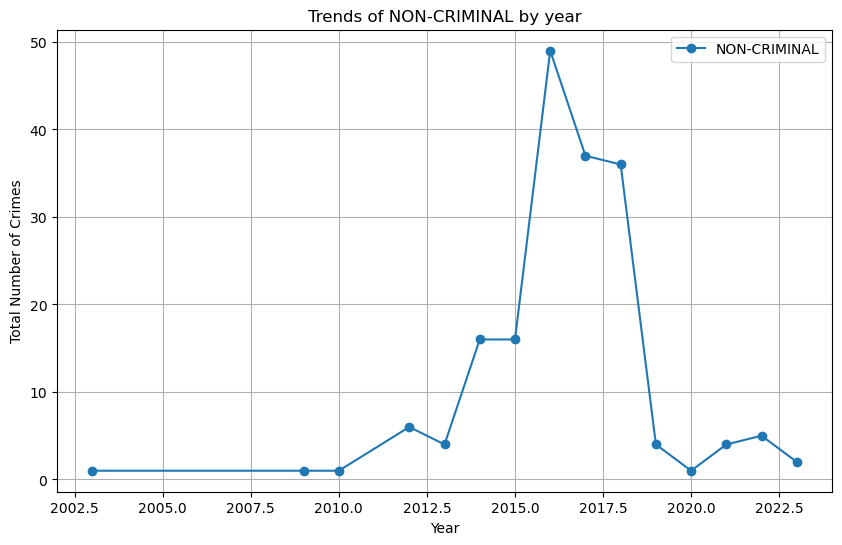

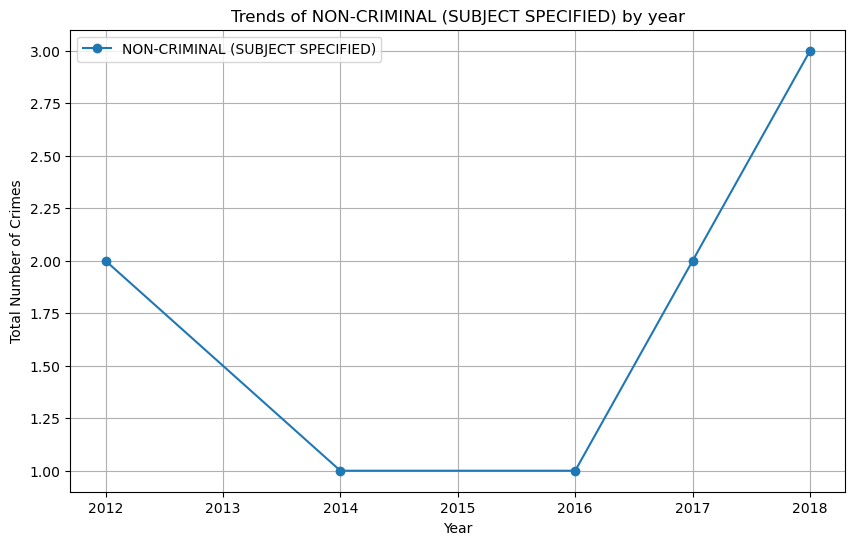

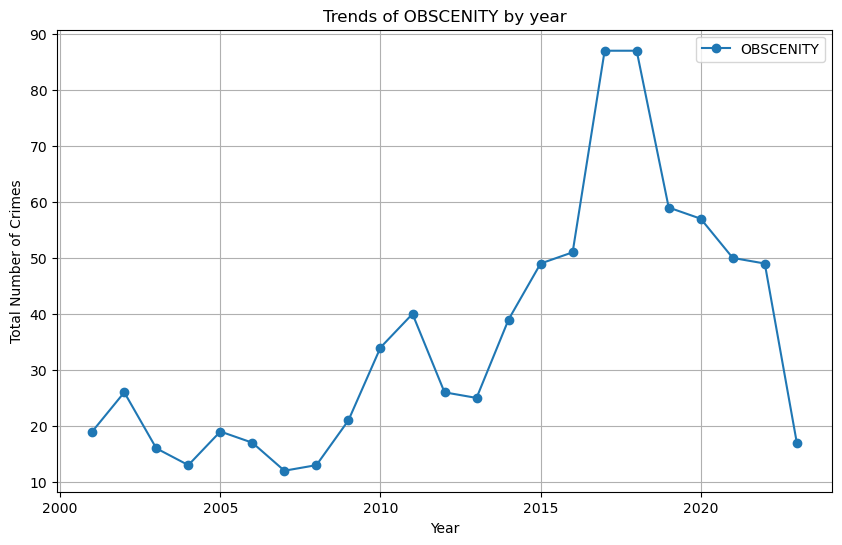

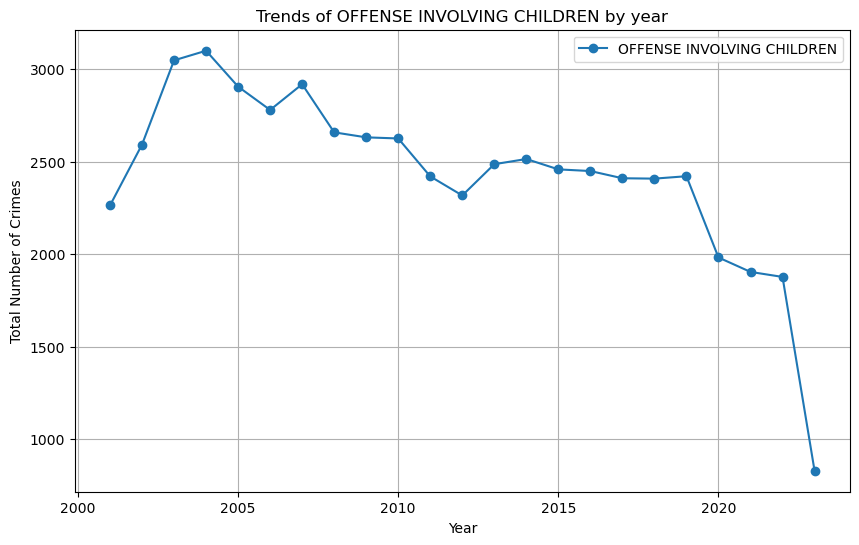

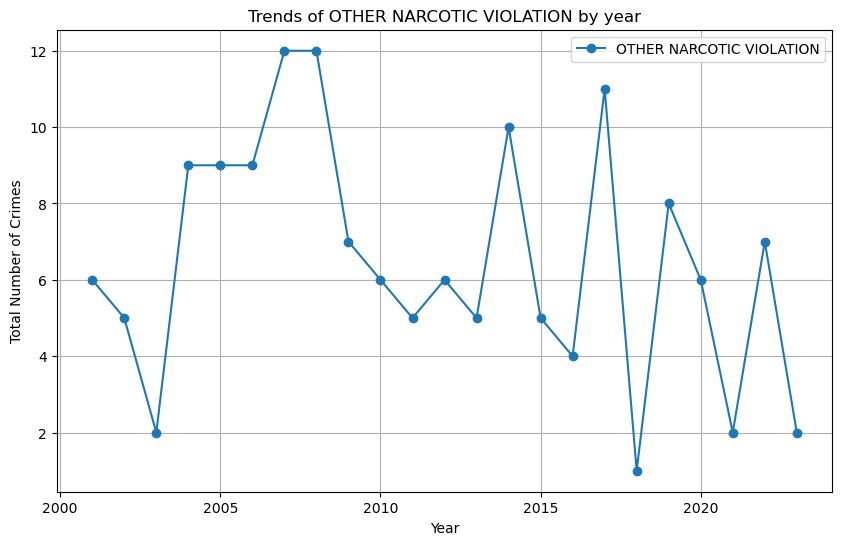

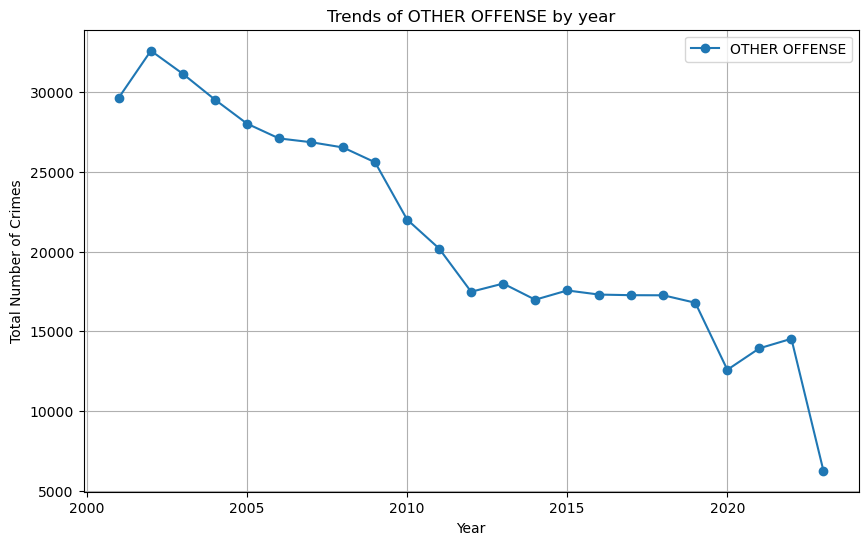

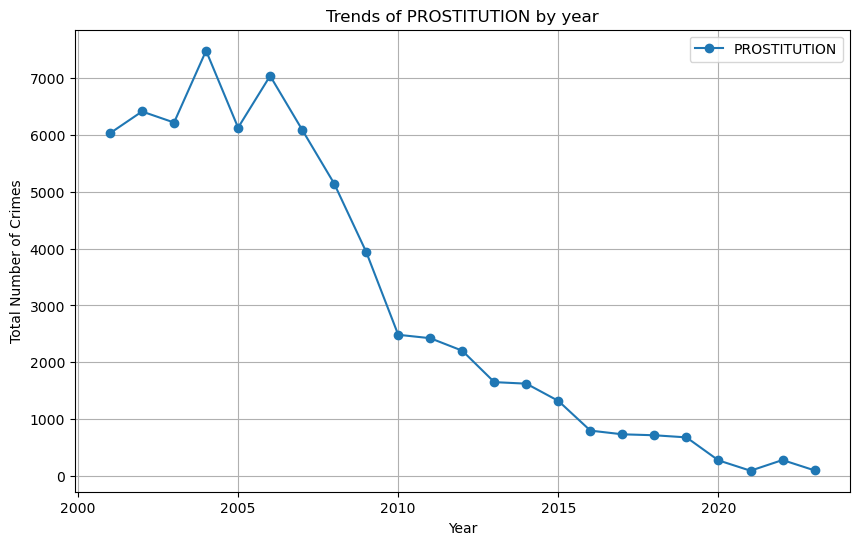

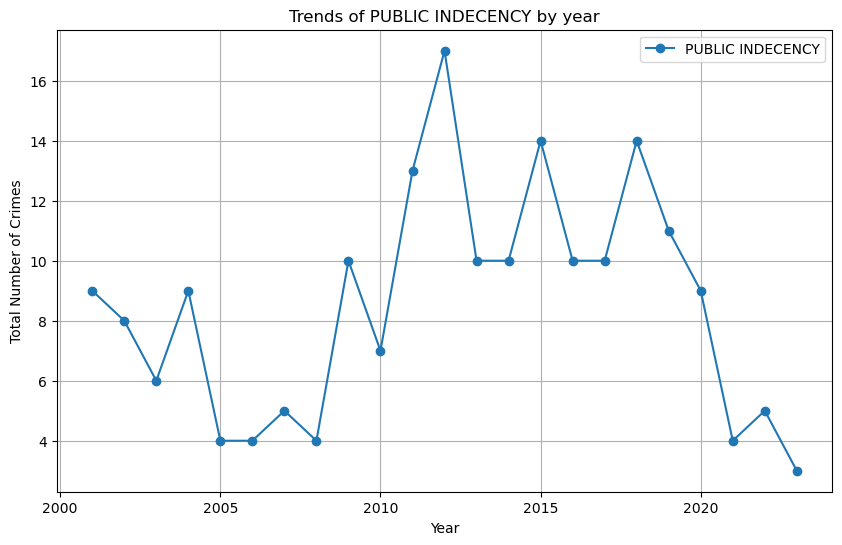

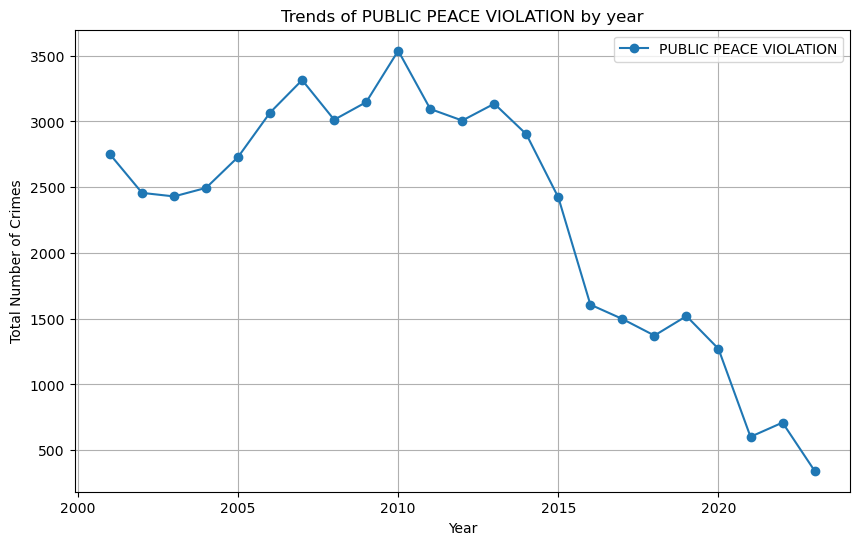

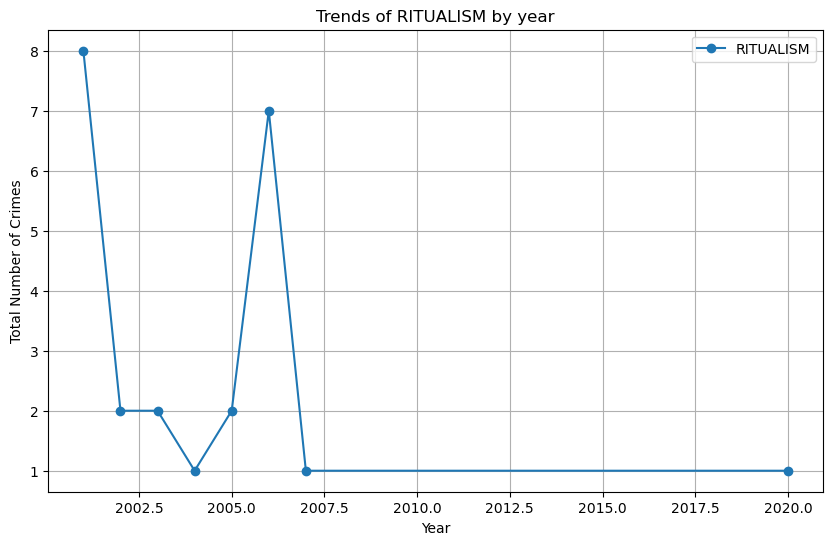

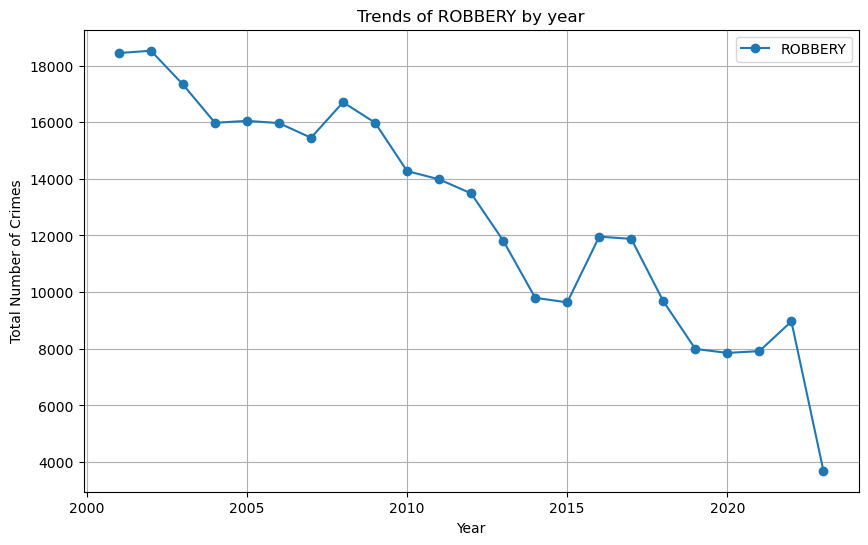

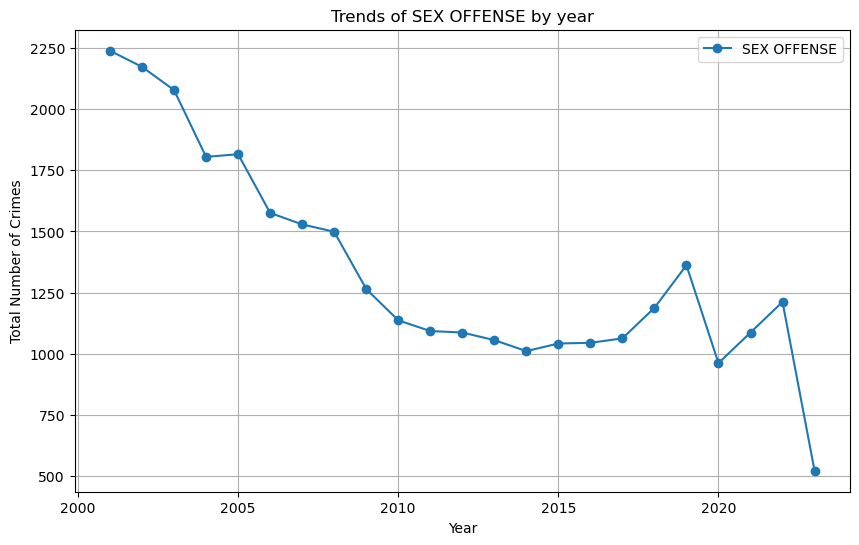

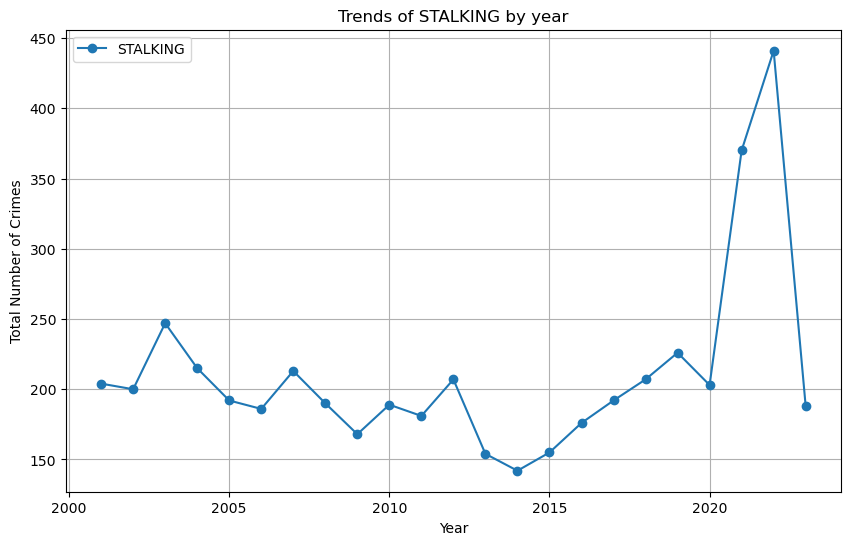

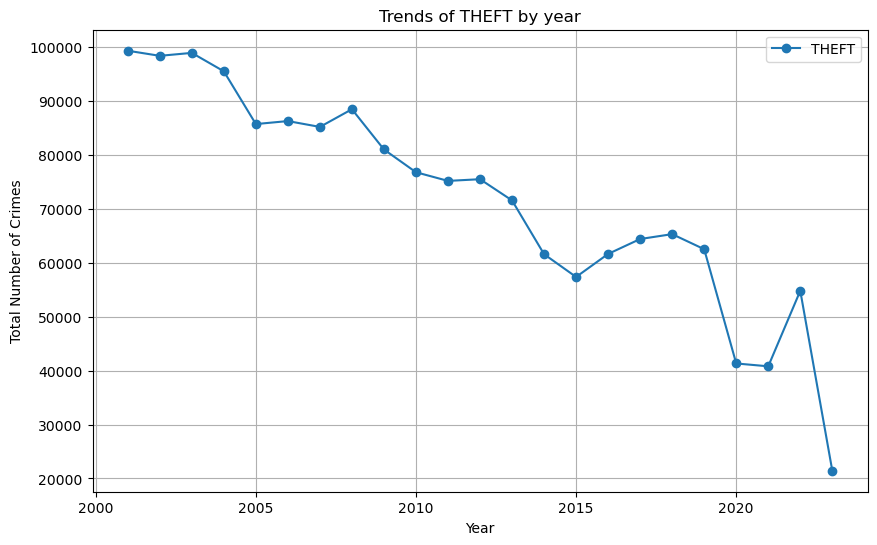

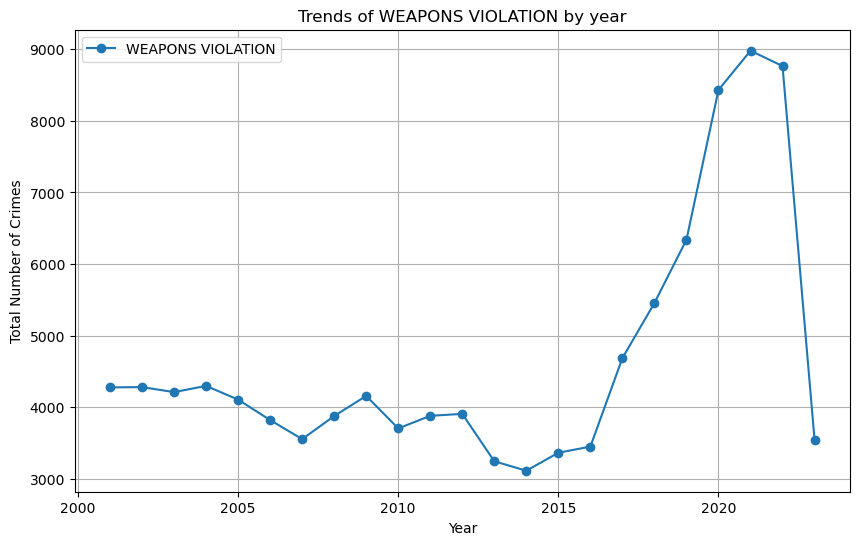

In [10]:
crimes_type_year = chicago.groupby(['Primary Type', 'Year'])['Total_Incidents'].sum()

# Get the list of unique crime types
crime_types = crimes_type_year.index.get_level_values('Primary Type').unique()

for crime_type in crime_types:
    data = crimes_type_year.loc[crime_type]
    plt.figure(figsize=(10, 6))
    data.plot(kind='line', marker='o', label=crime_type)
    plt.xlabel('Year')
    plt.ylabel('Total Number of Crimes')
    plt.title(f'Trends of {crime_type} by year')
    plt.legend()
    plt.grid(True)
    plt.show()

### Stalking and weapons violations went up from 2018 - 2022

## 4) Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

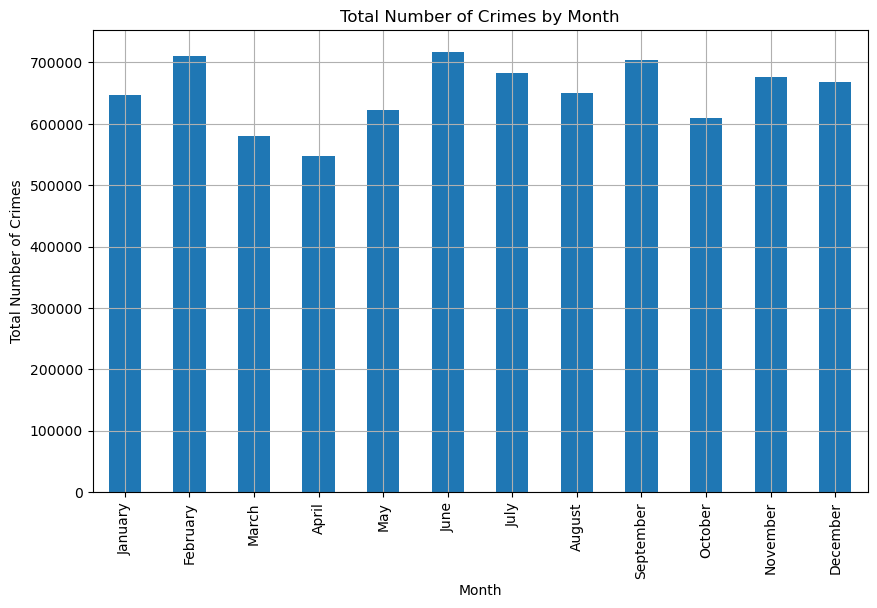

In [13]:
# ordering the months 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
# Grouping data by month and counting total incidents
total_crimes_by_month = chicago.groupby('MonthName')['Total_Incidents'].sum()

# Plotting the total number of crimes by month
plt.figure(figsize=(10, 6))
data = data.reindex(month_order)
total_crimes_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Number of Crimes')
plt.title('Total Number of Crimes by Month')
plt.xticks(range(len(month_order)), month_order, rotation=90)
plt.grid(True)
plt.show()


### April has the lowest amount of crime, while June tends to have the highest amount of crime

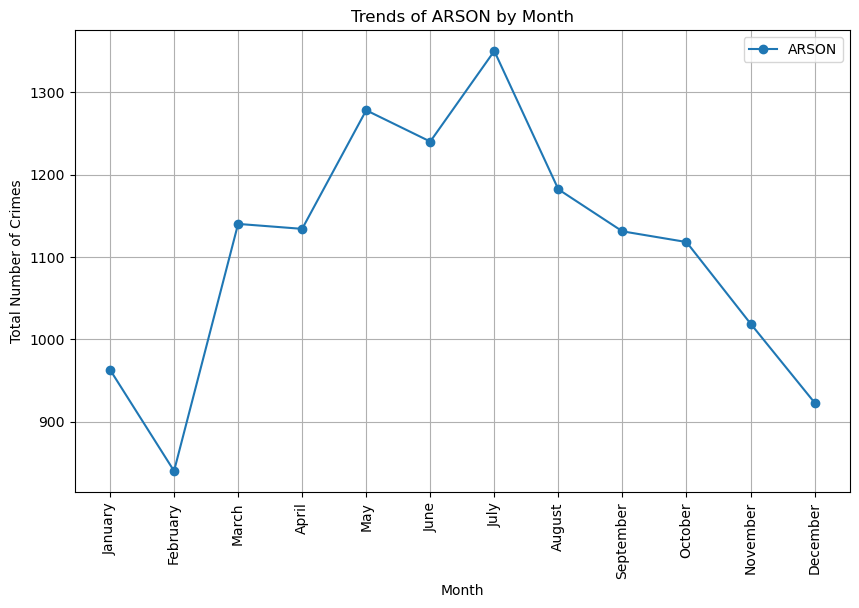

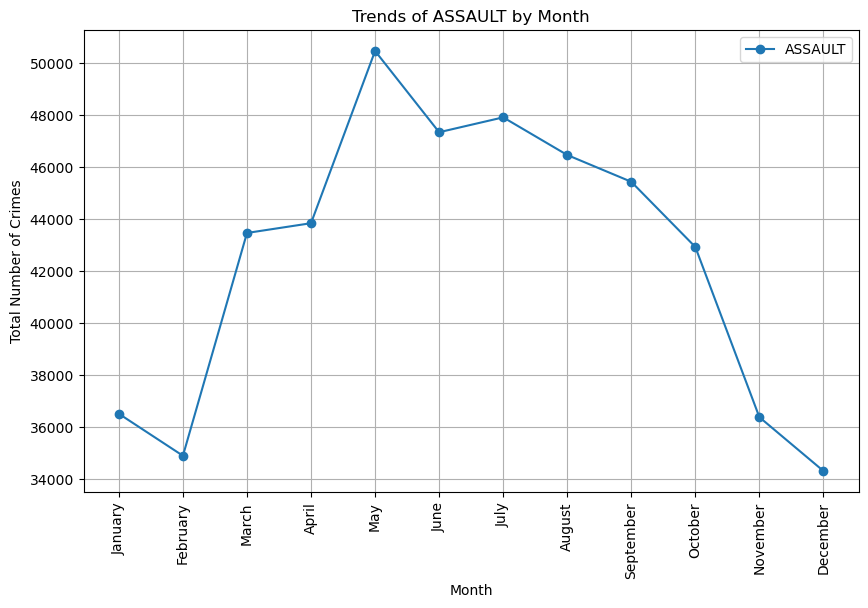

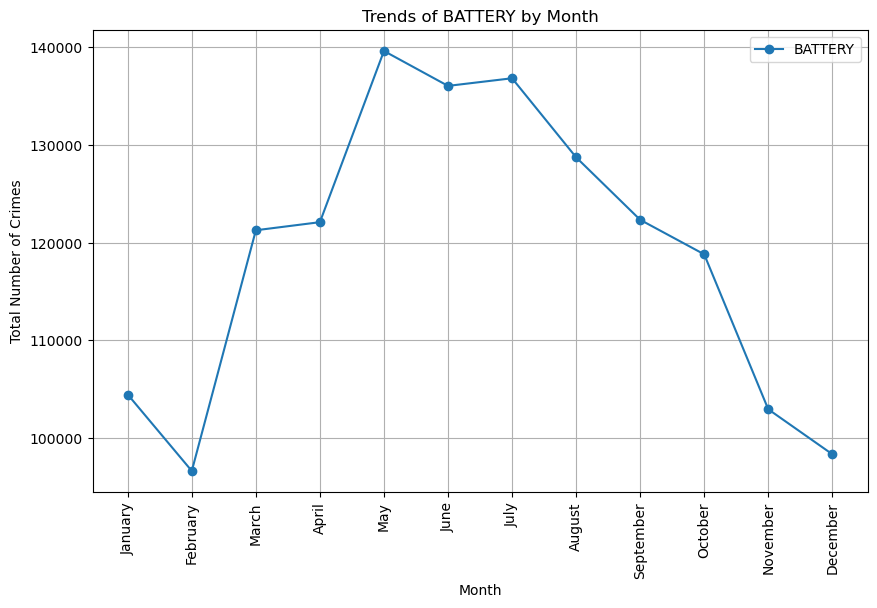

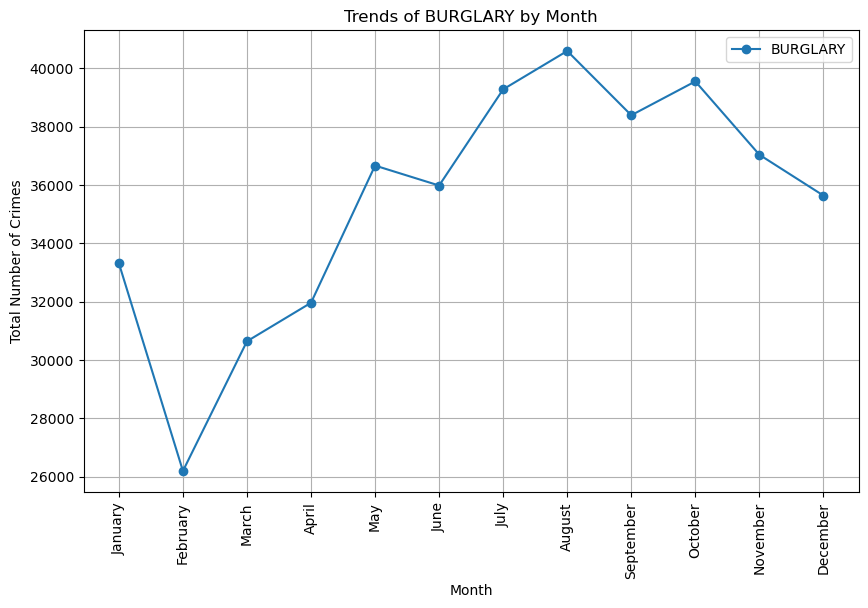

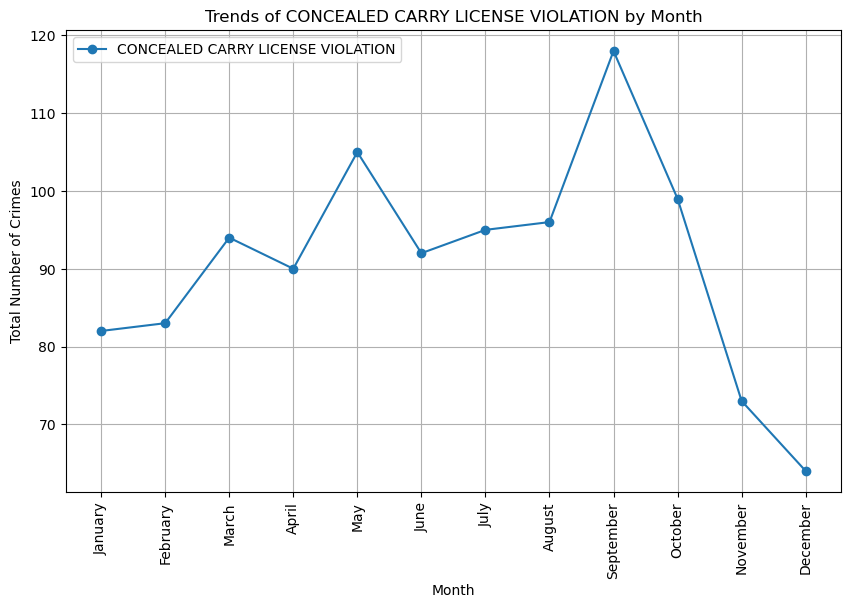

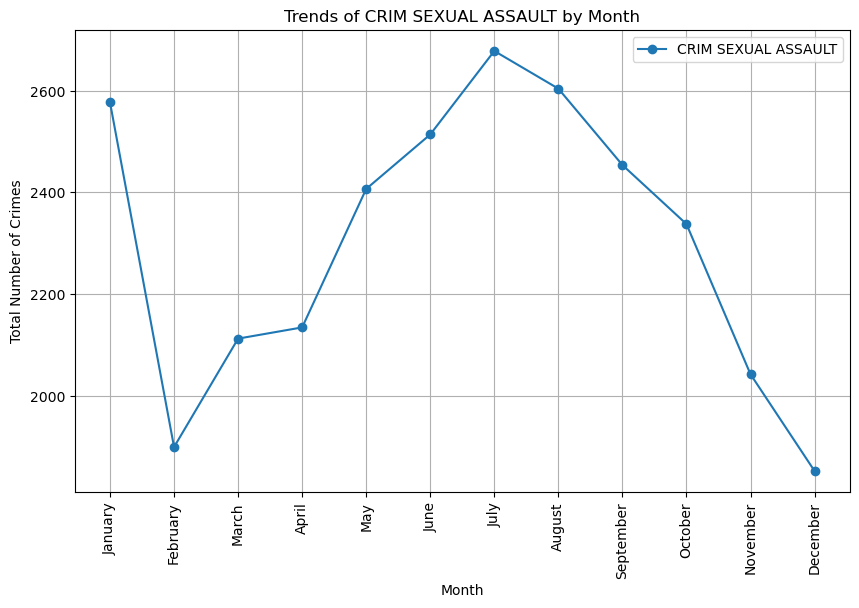

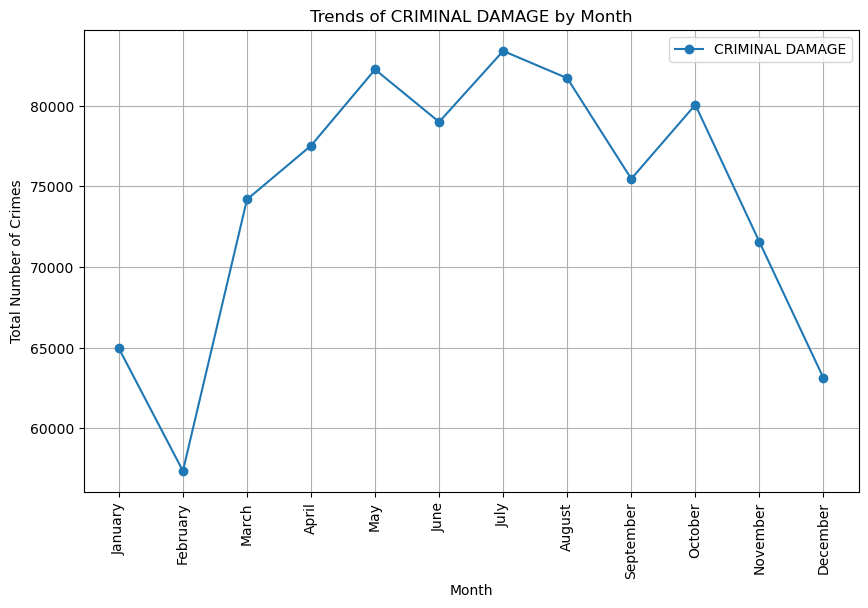

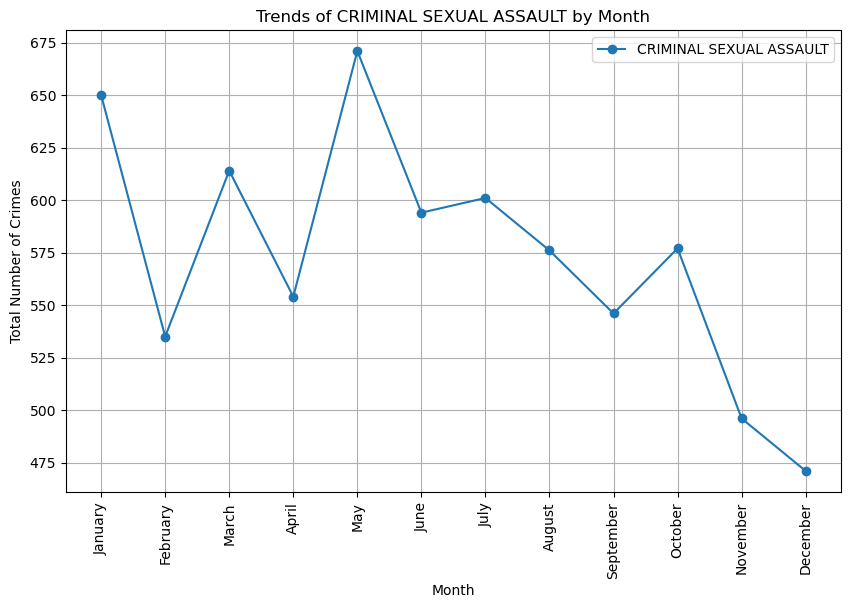

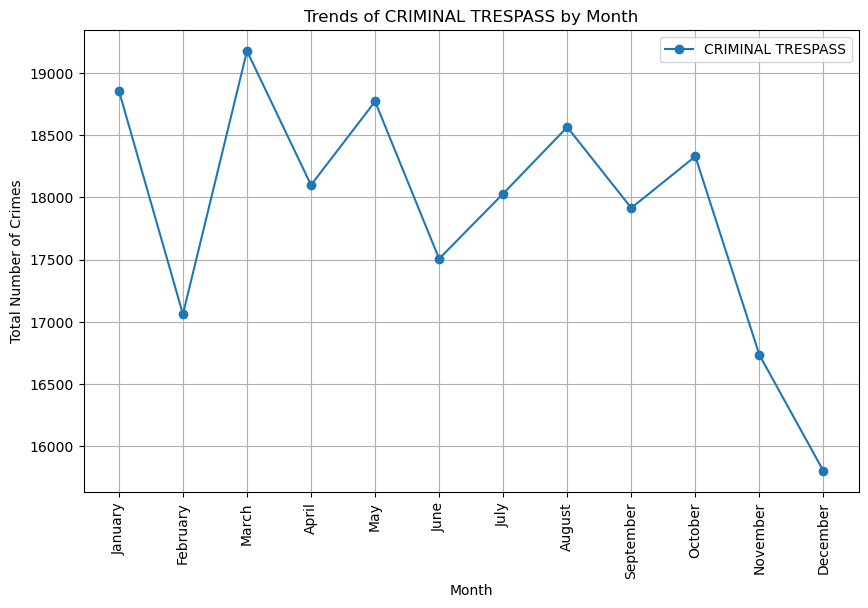

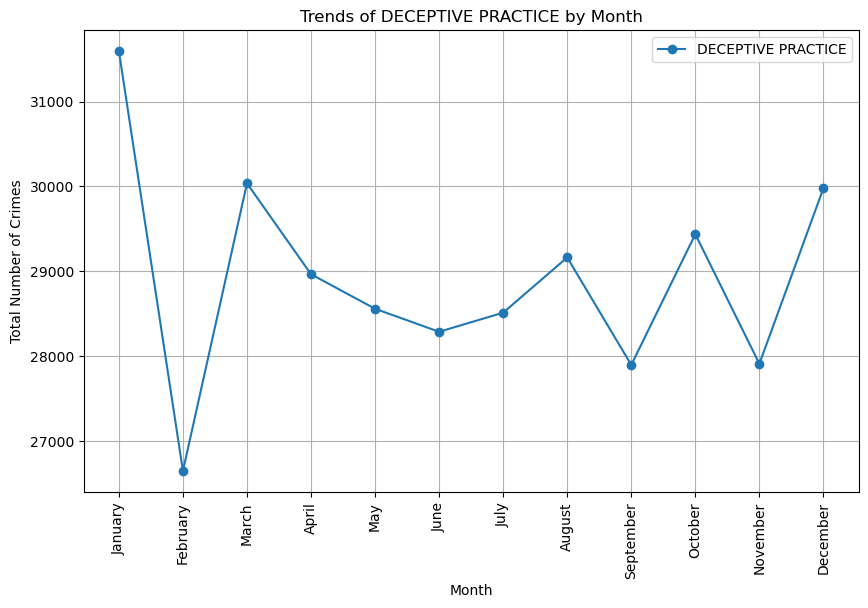

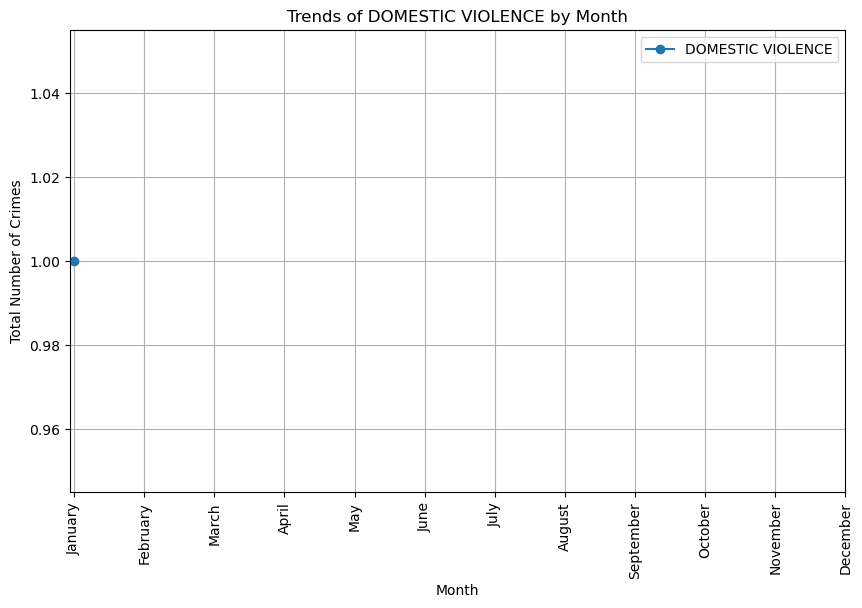

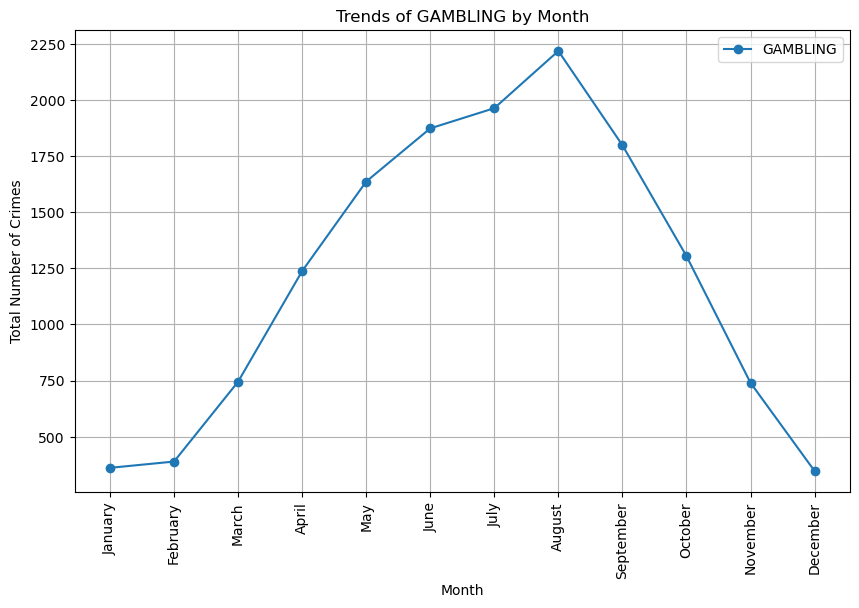

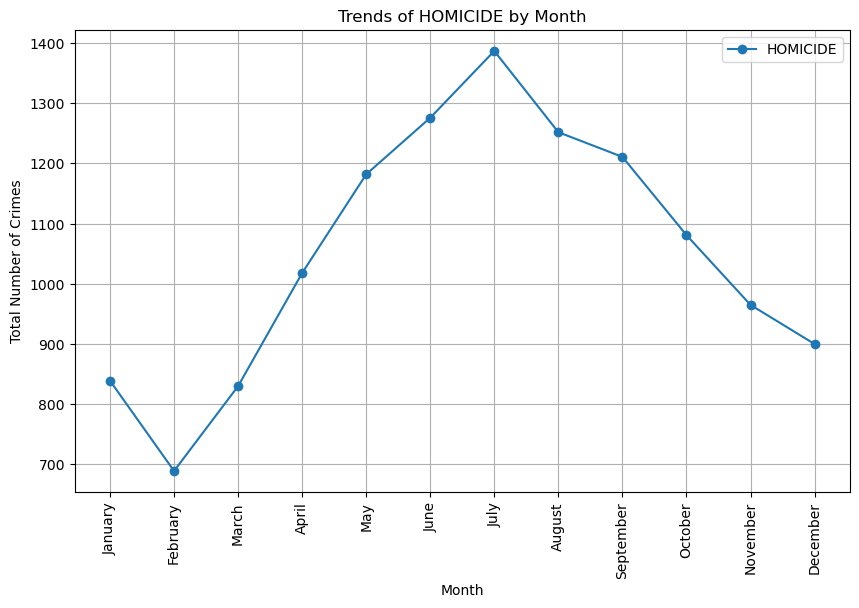

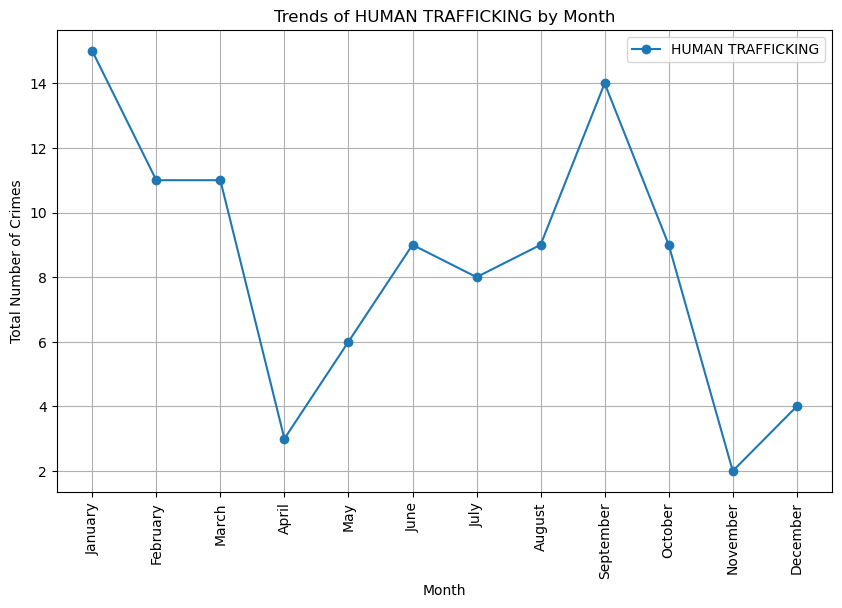

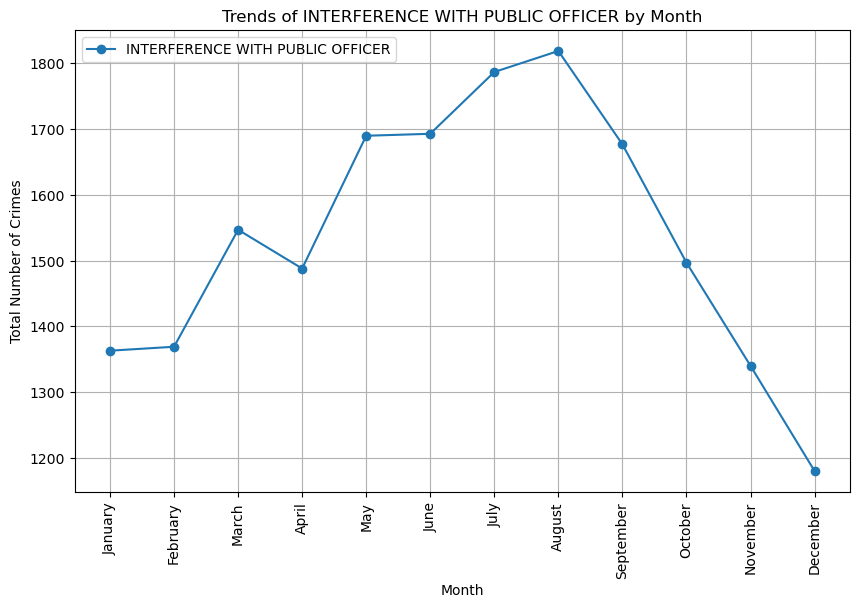

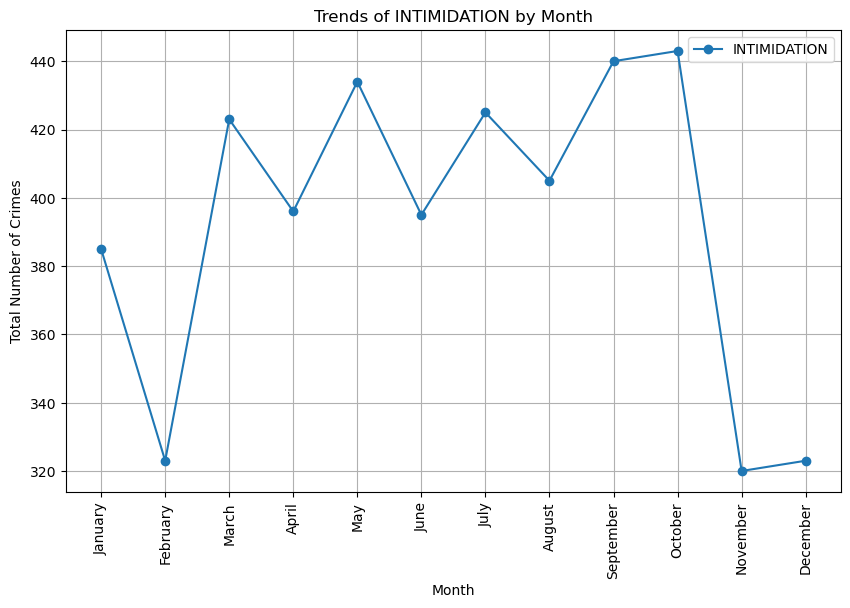

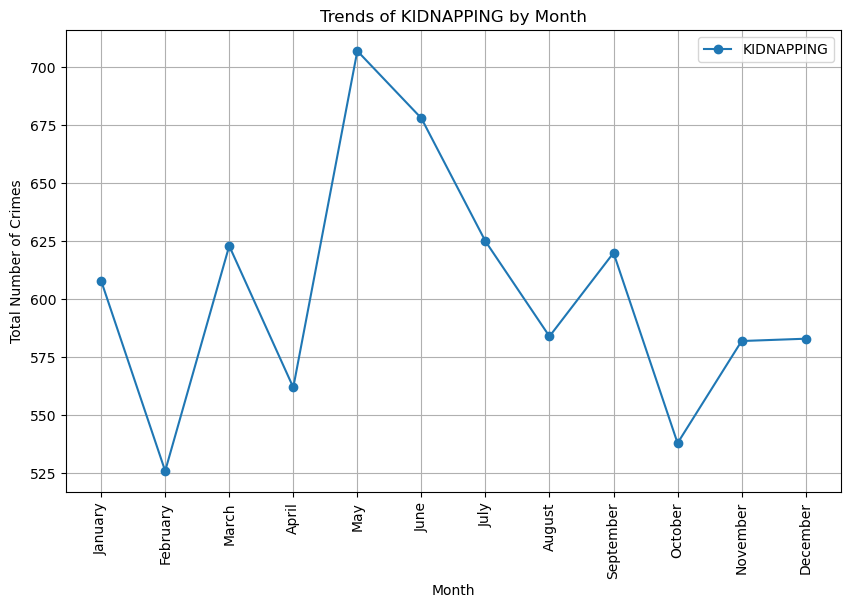

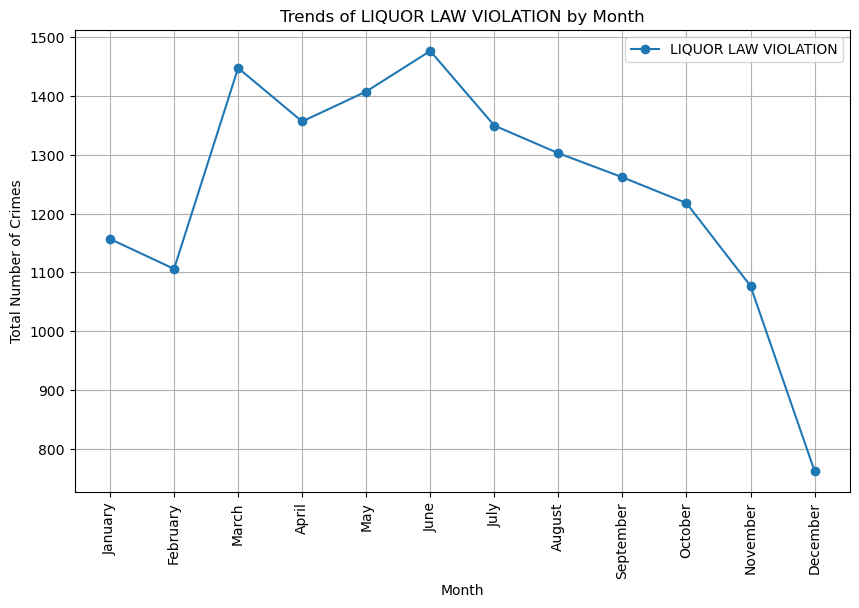

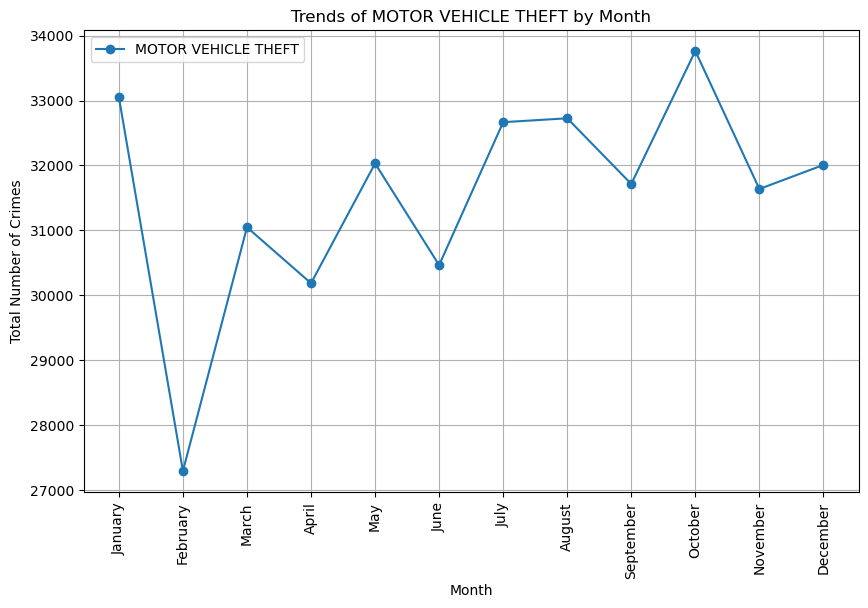

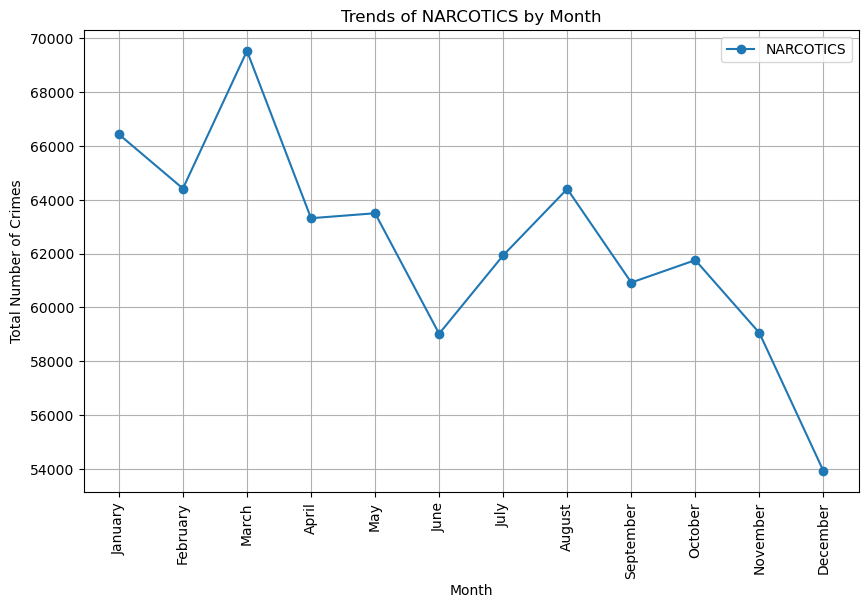

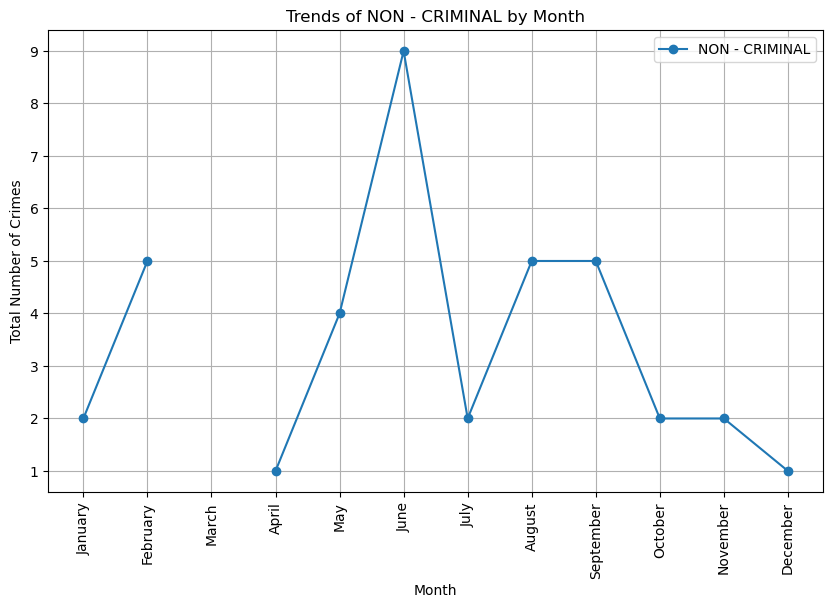

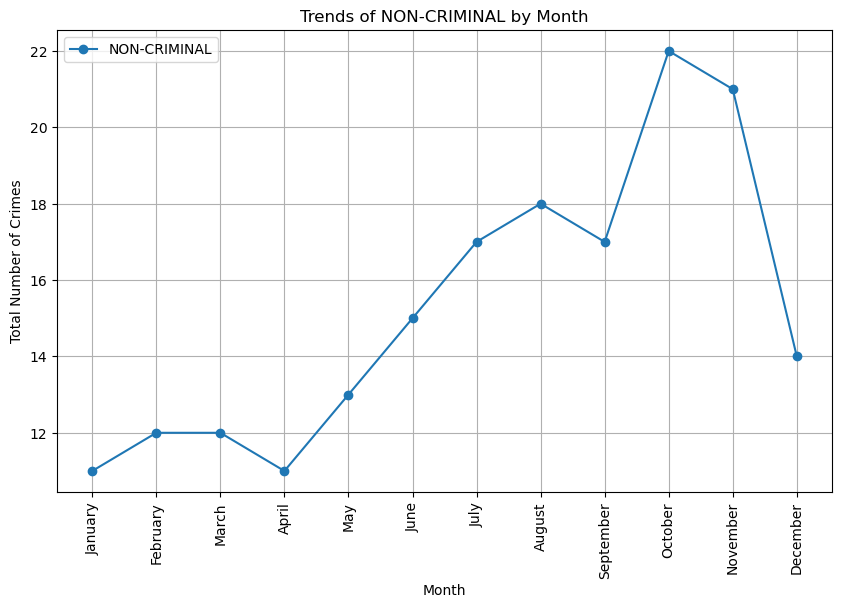

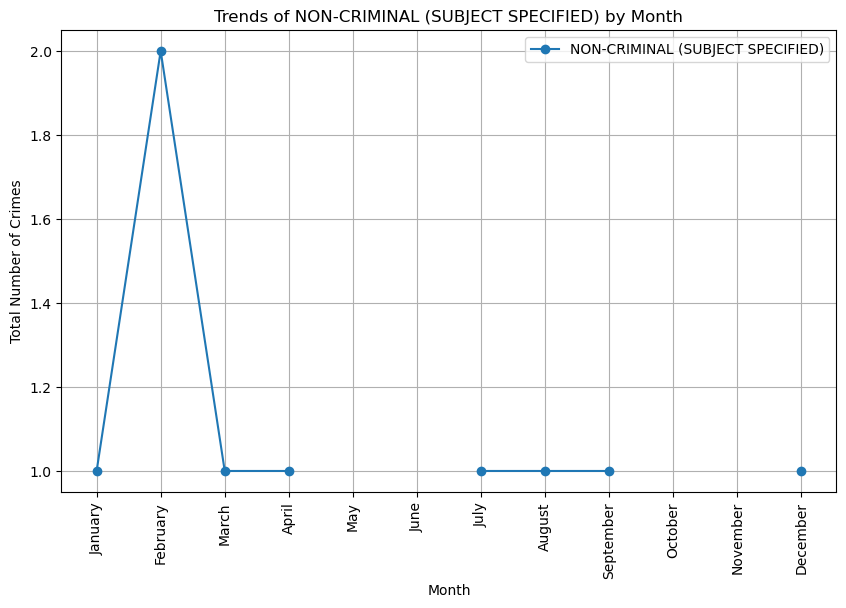

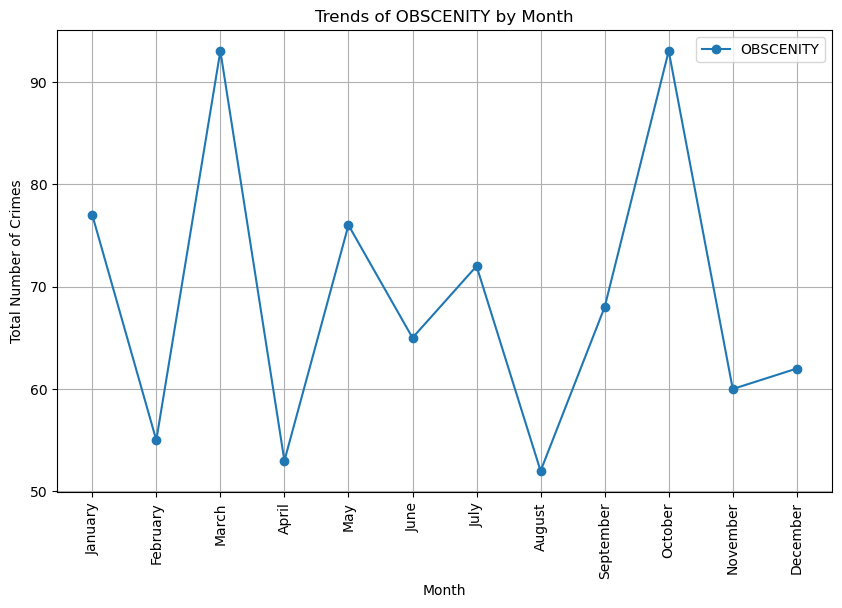

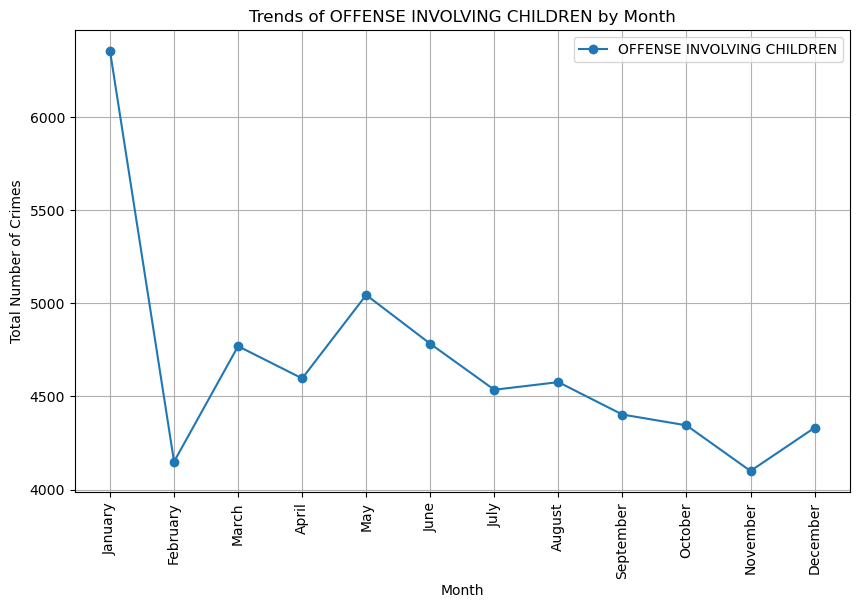

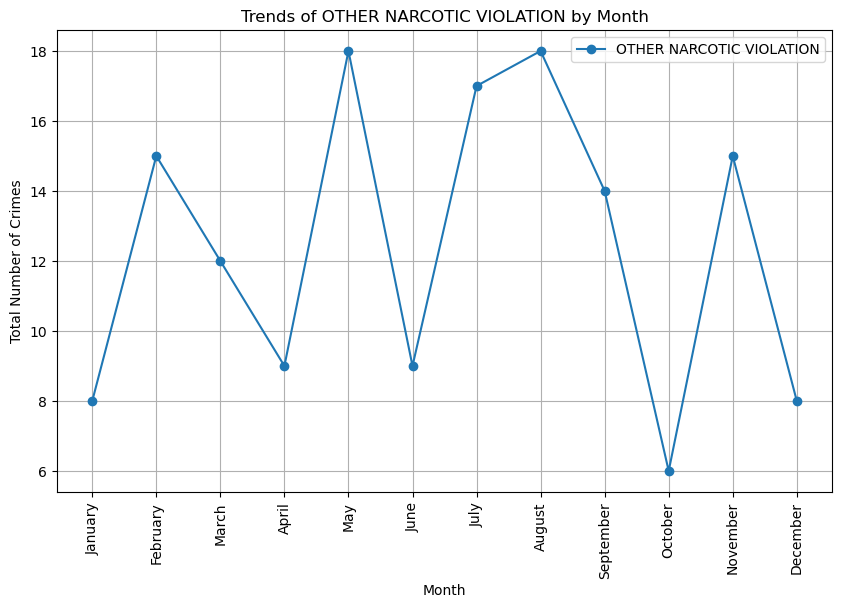

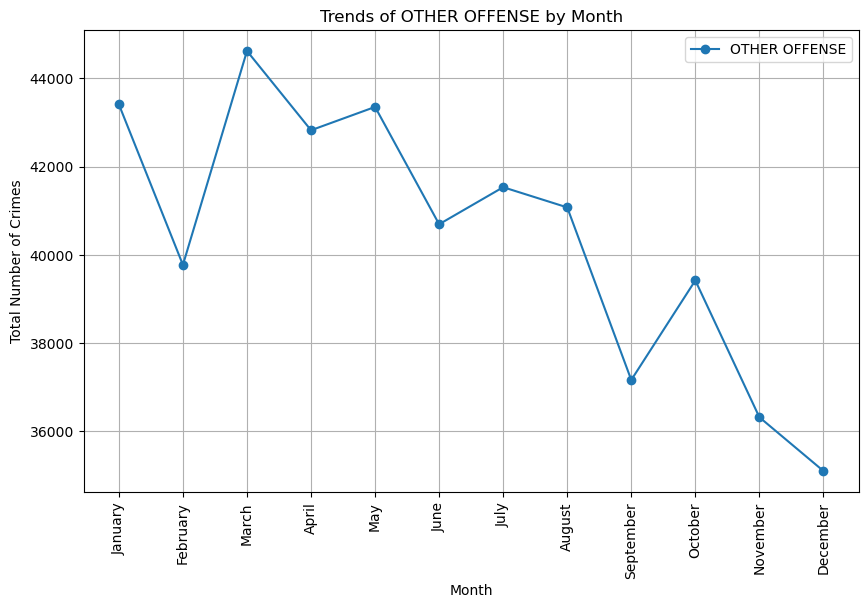

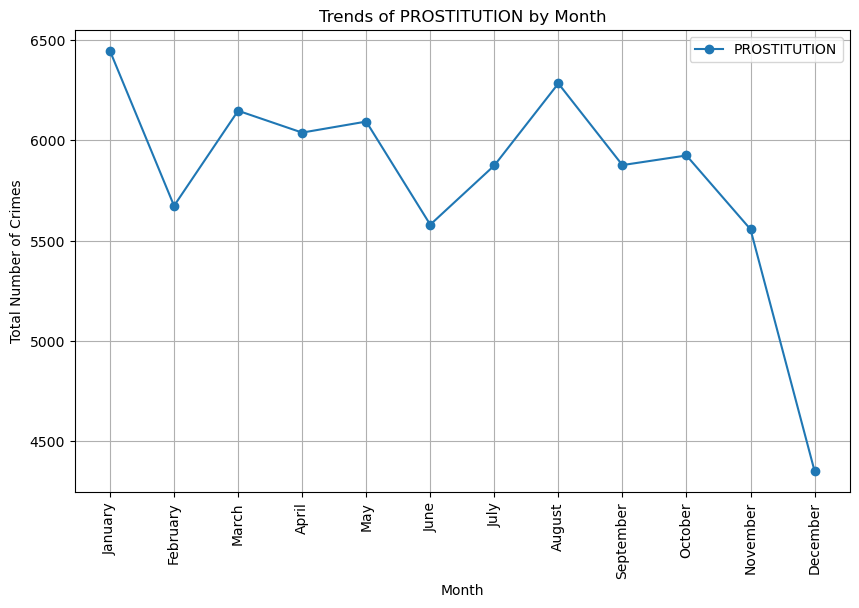

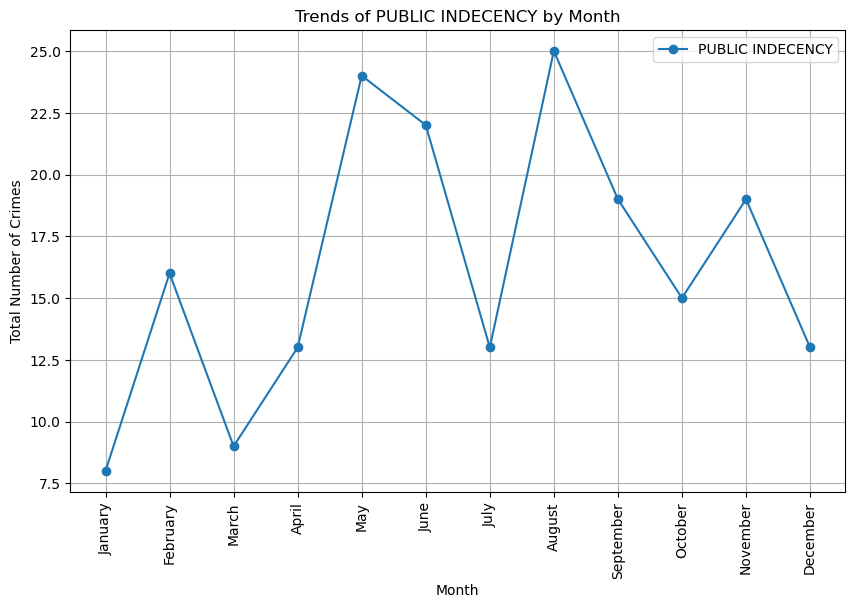

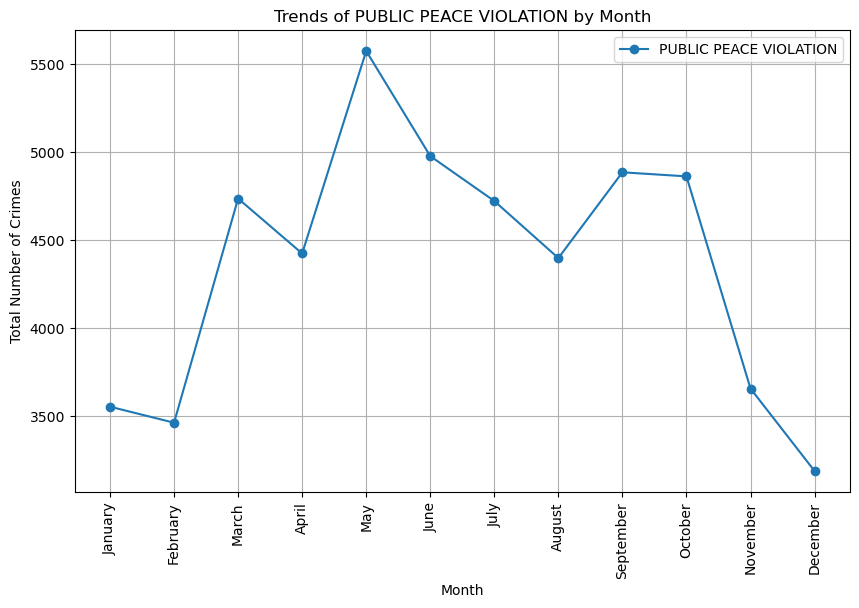

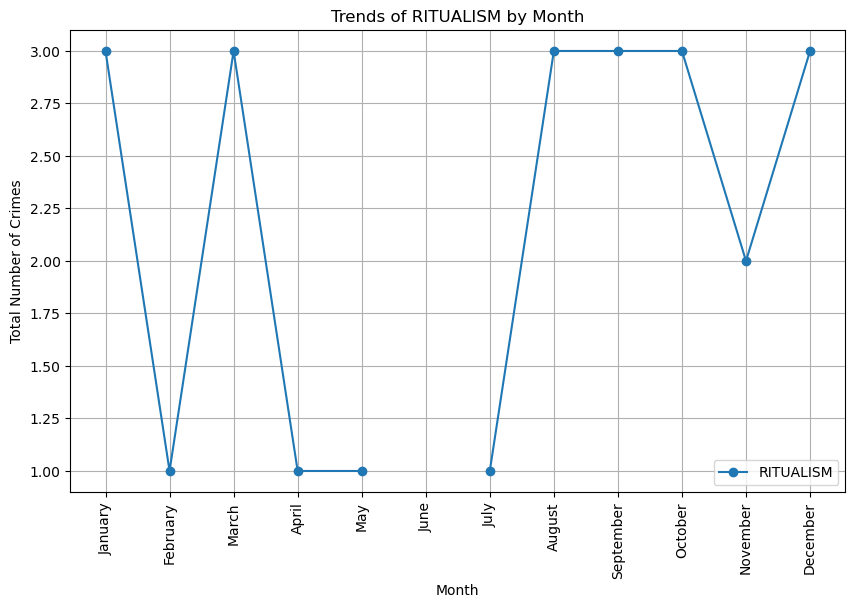

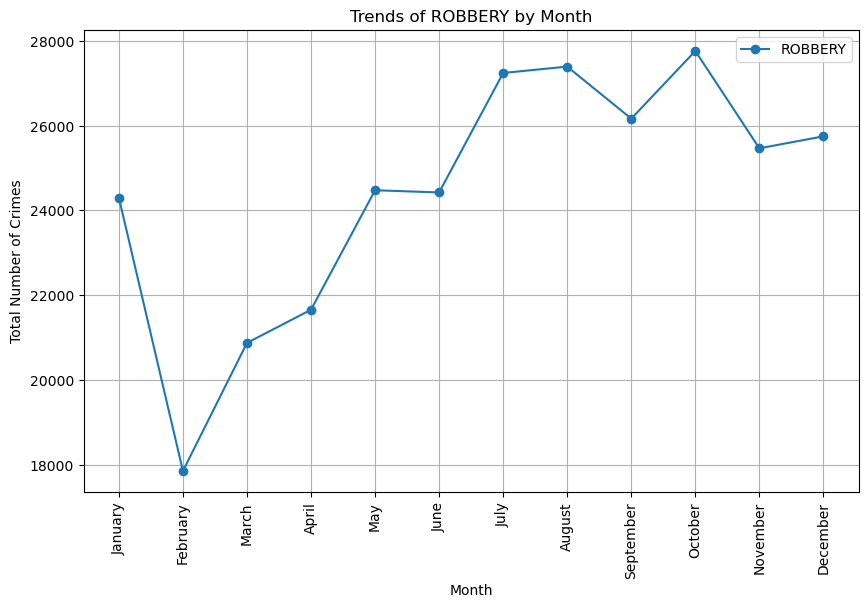

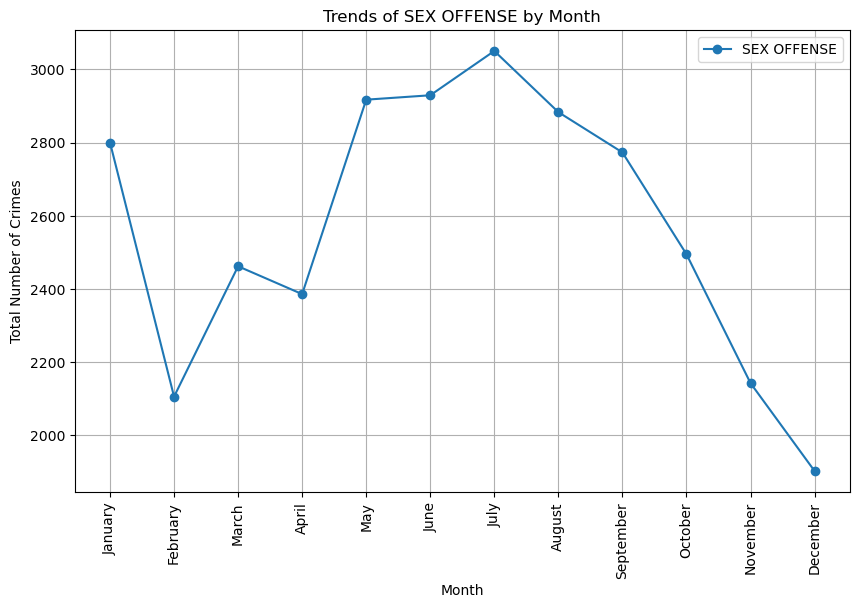

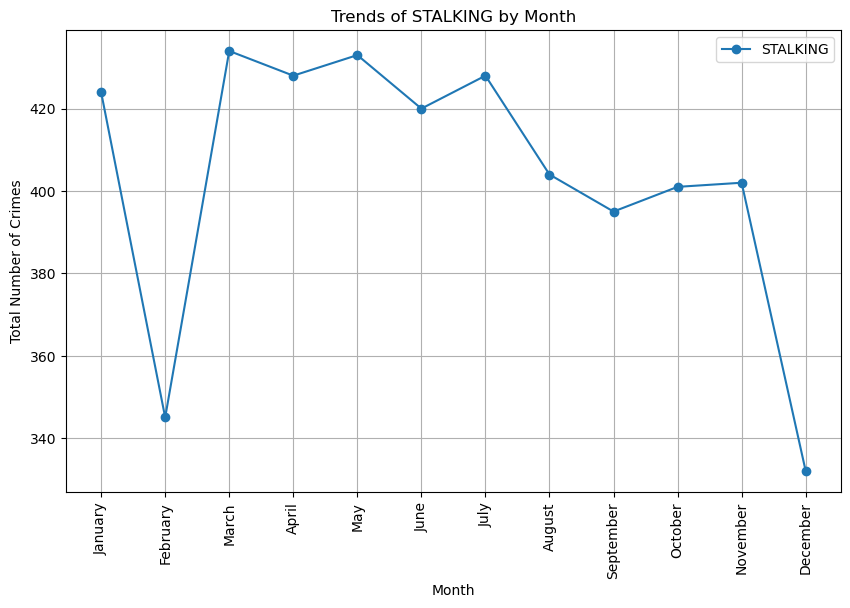

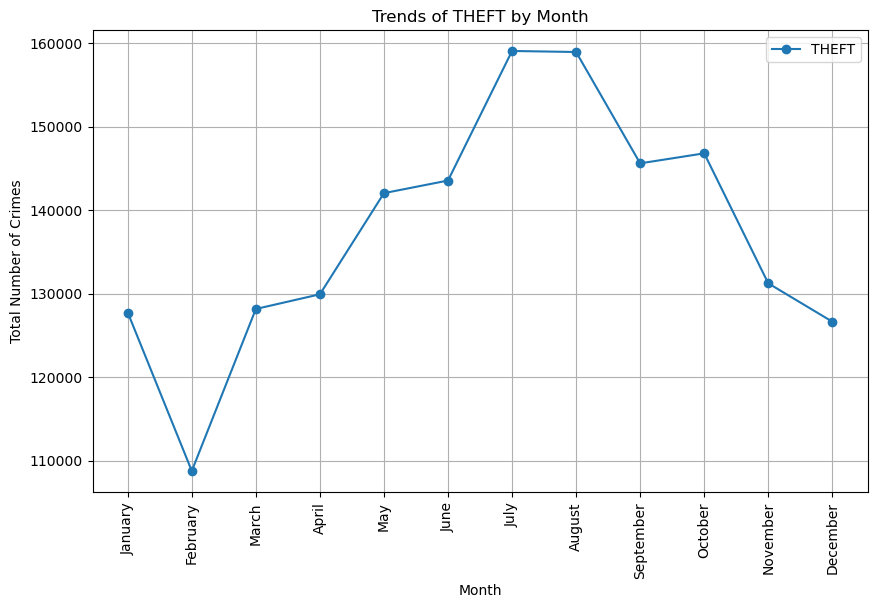

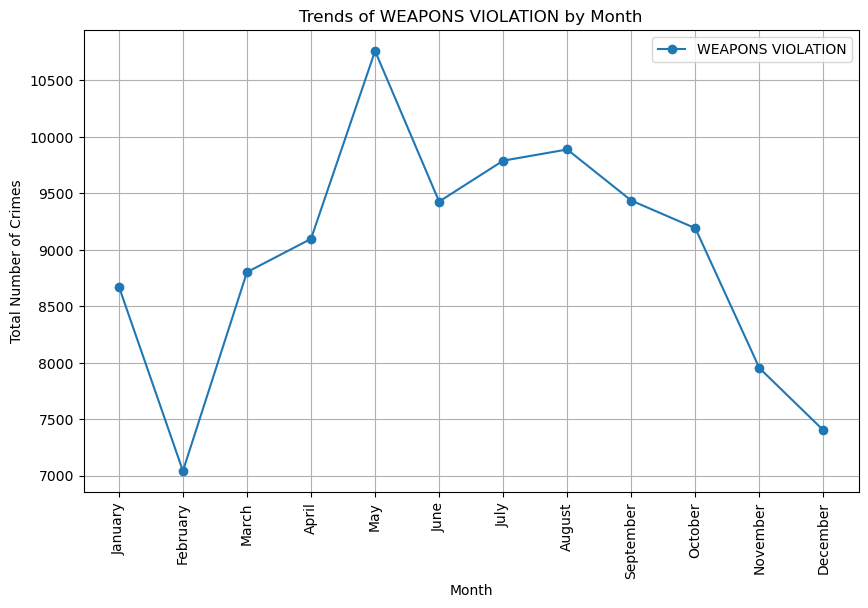

In [12]:
# ordering the months 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Grouping data by crime type and month and total incidents
crimes_by_type_and_month = chicago.groupby(['Primary Type', 'MonthName'])['Total_Incidents'].sum()

# Get the list of unique crime types
unique_crime_types = crimes_by_type_and_month.index.get_level_values('Primary Type').unique()

# Plotting the trends for each individual crime type with months in order
for crime_type in unique_crime_types:
    data = crimes_by_type_and_month.loc[crime_type]
    plt.figure(figsize=(10, 6))
    data = data.reindex(month_order)  # Reorder the data based on month_order
    data.plot(kind='line', marker='o', label=crime_type)
    plt.xlabel('Month')
    plt.ylabel('Total Number of Crimes')
    plt.title(f'Trends of {crime_type} by Month')
    plt.legend()
    plt.xticks(range(len(month_order)), month_order, rotation=90)  # Set ticks and rotate
    plt.grid(True)
    plt.show()

### Ritualism does not follow the normal pattern.

# Tableau link:
https://public.tableau.com/app/profile/paul.montecinos/viz/ChicagoCrimesDashboard_16874712686830/MainDashboard?publish=yes 
